In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_theme(palette='rocket')
sns.set_style('darkgrid')

In [2]:
match_stats_venue = pd.read_csv('match_stats_venue.csv')

In [3]:
match_stats_venue.head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


## Aalysis for finding Batsman

In [4]:
bat_run = match_stats_venue.groupby('Striker',axis=0)
temp=bat_run.sum()
temp=pd.DataFrame(temp)

grouped.agg({'C_sum' : lambda x: x['C'].sum(),
             'C_std': lambda x: x['C'].std(),
             'D_sum' : lambda x: x['D'].sum()},
             'D_sumifC3': lambda x: x['D'][x['C'] == 3].sum(), ...)
             
df.groupby('group').agg({'a':['sum', 'max'], 
                         'b':'mean', 
                         'c':'sum', 
                         'd': lambda x: x.max() - x.min()})




In [5]:
bat = match_stats_venue.groupby(['Striker']).agg({'Ball_Id' : lambda x: x.count(),
                                                'runs_by_batsman':lambda x: x.sum(),
                                                 'Kind_Out':lambda x:x.count()})
bat=pd.DataFrame(bat)
print("Type of our data :",type(bat))
bat=bat.sort_values(['runs_by_batsman','Ball_Id'],ascending=[False,False])
bat=bat.head(20)
bat.head

Type of our data : <class 'pandas.core.frame.DataFrame'>


<bound method NDFrame.head of                 Ball_Id  runs_by_batsman  Kind_Out
Striker                                           
SK Raina           3059           4106.0       122
V Kohli            3237           4105.0       115
RG Sharma          2996           3874.0       121
G Gambhir          3028           3634.0       117
CH Gayle           2359           3447.0        81
RV Uthappa         2721           3390.0       119
DA Warner          2440           3373.0        91
MS Dhoni           2419           3270.0        92
AB de Villiers     2231           3270.0        78
S Dhawan           2622           3082.0        95
YK Pathan          1953           2779.0        90
V Sehwag           1833           2728.0        98
AM Rahane          2274           2675.0        76
SR Watson          1869           2553.0        79
KD Karthik         2092           2542.0       112
M Vijay            2092           2511.0        91
BB McCullum        1954           2435.0        89
J

In [6]:
avg_run = bat['runs_by_batsman']/bat['Kind_Out']

In [7]:
bat['avg_of_batsman'] = avg_run

In [8]:
print(type(bat))


<class 'pandas.core.frame.DataFrame'>


In [9]:
strike_rate = bat['runs_by_batsman']*100/bat['Ball_Id']

In [10]:
bat["strike_rate"]=strike_rate
bat.head(20)

,Ball_Id,runs_by_batsman,Kind_Out,avg_of_batsman,strike_rate
Striker,,,,,
SK Raina,3059,4106.0,122,33.655738,134.226872
V Kohli,3237,4105.0,115,35.695652,126.814952
RG Sharma,2996,3874.0,121,32.016529,129.305741
G Gambhir,3028,3634.0,117,31.059829,120.013210
CH Gayle,2359,3447.0,81,42.555556,146.121238
RV Uthappa,2721,3390.0,119,28.487395,124.586549
DA Warner,2440,3373.0,91,37.065934,138.237705
MS Dhoni,2419,3270.0,92,35.543478,135.179826
AB de Villiers,2231,3270.0,78,41.923077,146.571044


In [11]:
bat.rename(columns={'Ball_Id':'total_bals_played','runs_by_batsman':'total_runs','Kind_Out':'times_dismissal'},inplace=True)
bat.head()
bat.to_csv(r'C:\E\IMARTICUS\SEM_2\DL_ML\bat.csv')

In [12]:
bat=pd.read_csv('bat.csv')
bat.head()
bat.loc[bat['Striker']=='A Mishra']

,Striker,total_bals_played,total_runs,times_dismissal,avg_of_batsman,strike_rate


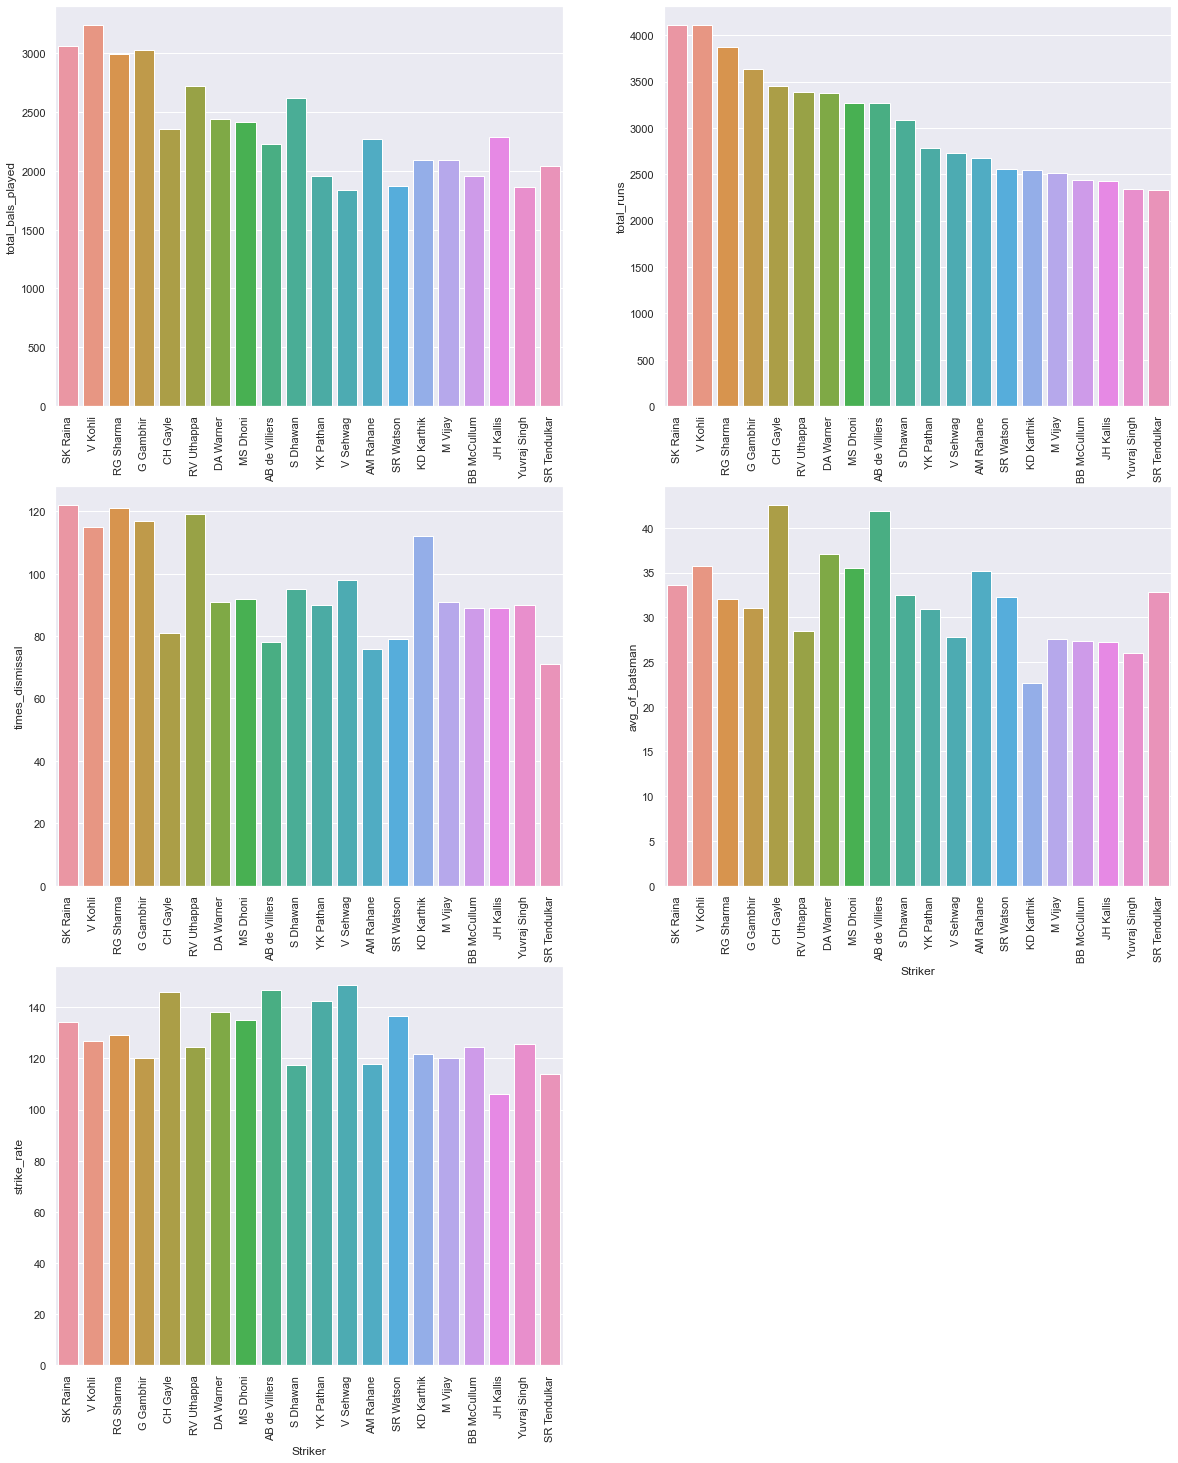

In [13]:
plt.figure(figsize=(20,25))
col = [bat['total_bals_played'],bat['total_runs'],bat['times_dismissal'],bat['avg_of_batsman'],bat['strike_rate']]
c=1
for i in col:    
    plt.subplot(3,2,c)
    sns.barplot(x=bat['Striker'],y=i)
    plt.xticks(rotation=90)
    c+=1
plt.show()

#### 6 hiting players

In [14]:
match_stats_venue.head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [15]:
match_stats_venue['runs_by_batsman'].unique()

array([ 0., nan,  4.,  6.,  1.,  2.,  5.,  3.])

In [16]:
six_four=match_stats_venue.loc[(match_stats_venue['runs_by_batsman'] ==4) | (match_stats_venue['runs_by_batsman'] ==6) ]

bat = match_stats_venue.groupby(['Striker']).agg({'Ball_Id' : lambda x: x.count(),
                                                'runs_by_batsman':lambda x: x.sum(),
                                                 'Kind_Out':lambda x:x.count()})

In [17]:
six = six_four.loc[six_four['runs_by_batsman']==6]
six = six.groupby(['Striker']).agg({'runs_by_batsman': lambda x:x.count()})
#bat=bat.sort_values(['runs_by_batsman','Ball_Id'],ascending=[False,False])
six = six.sort_values("runs_by_batsman",axis=0,ascending=False)

In [18]:
six.to_csv(r'C:\E\IMARTICUS\SEM_2\DL_ML\all_season_six.csv')
six=pd.read_csv('all_season_six.csv')


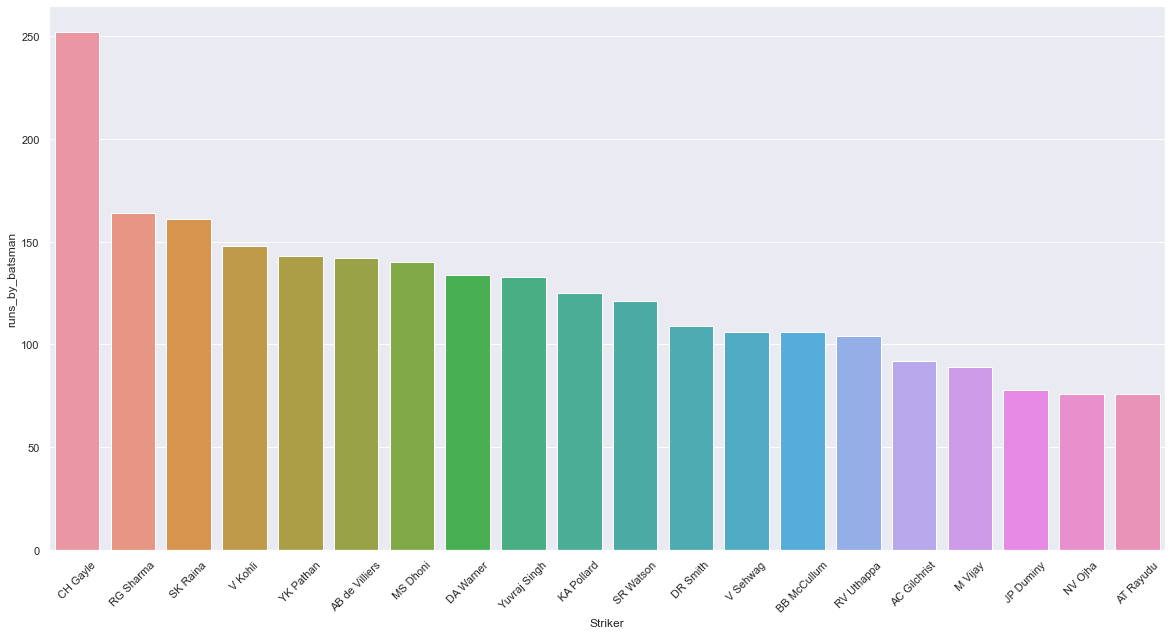

In [19]:
six=six.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=six['Striker'],y=six['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [20]:
#df.groupby(['col5','col2']).reset_index()
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=1) & (match_stats_venue['Over_Id']<=6) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temp))
print(temp.shape)

<class 'pandas.core.frame.DataFrame'>
(1135, 1)


In [21]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1135 entries, (1, 'A Chopra') to (6, 'Yuvraj Singh')
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (runs_by_batsman, sum)  1135 non-null   float64
dtypes: float64(1)
memory usage: 14.2+ KB


In [22]:
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)

In [23]:
temp

runs_by_batsman
                                sum
Over_Id Striker                    
5       G Gambhir             373.0
2       G Gambhir             358.0
3       CH Gayle              350.0
        G Gambhir             337.0
4       G Gambhir             336.0
...                             ...
6       P Negi                  0.0
2       R Ashwin                0.0
        R McLaren               0.0
        RA Jadeja               0.0
4       DJ Thornely             0.0

[1135 rows x 1 columns]

In [24]:
mean_power = temp[('runs_by_batsman','sum')].mean()

In [25]:
temp = temp.loc[(temp[('runs_by_batsman','sum')]>mean_power)]

In [26]:
type(temp)

pandas.core.frame.DataFrame

In [27]:
temp.shape

(308, 1)

In [28]:
power_play_bat = temp.head(30)

In [29]:
power_play_bat.shape

(30, 1)

In [30]:
power_play_bat

runs_by_batsman
                                 sum
Over_Id Striker                     
5       G Gambhir              373.0
2       G Gambhir              358.0
3       CH Gayle               350.0
        G Gambhir              337.0
4       G Gambhir              336.0
3       M Vijay                332.0
6       SK Raina               331.0
2       DA Warner              320.0
1       V Sehwag               310.0
3       S Dhawan               309.0
        V Sehwag               306.0
2       V Sehwag               305.0
        CH Gayle               301.0
5       DA Warner              300.0
3       BB McCullum            291.0
5       CH Gayle               290.0
3       DA Warner              289.0
5       SK Raina               288.0
1       AC Gilchrist           285.0
4       RV Uthappa             284.0
2       AC Gilchrist           279.0
1       CH Gayle               277.0
6       G Gambhir              276.0
4       DA Warner              273.0
2       S Dhawan               266.0
        M Vijay                263.0
4       S Dhawan               260.0
3       RV Uthappa             260.0
4       CH Gayle               259.0
        SR Tendulkar           258.0

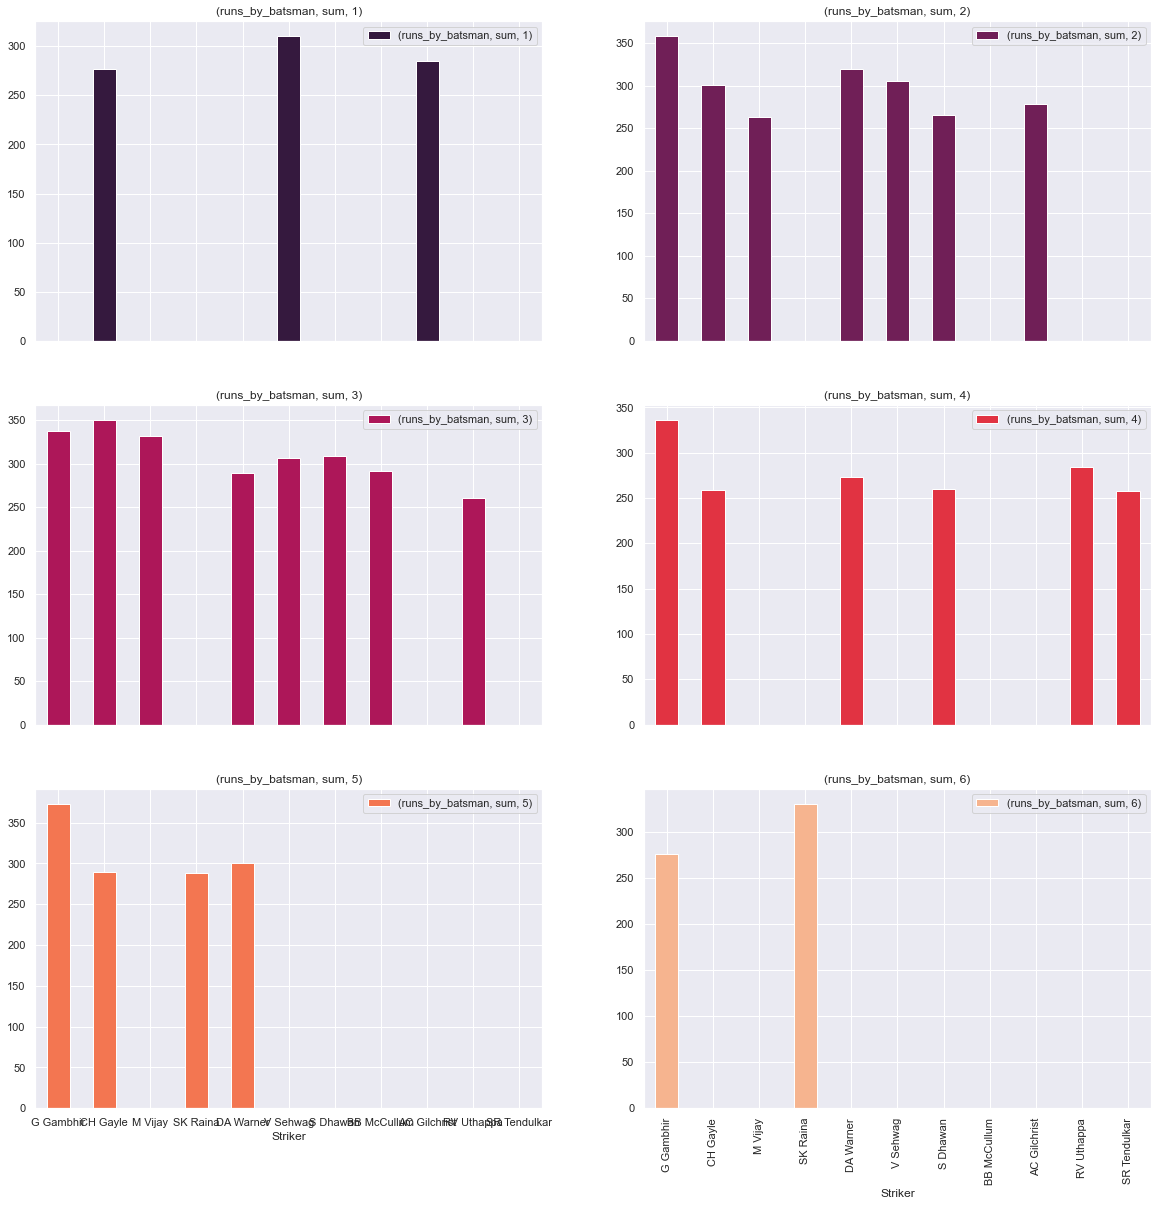

In [31]:
ax = power_play_bat.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 20), layout=(3, 2))
plt.xticks(rotation=90)
plt.show()

In [32]:
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=6) & (match_stats_venue['Over_Id']<15) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temp))
print(temp.shape)
temp.head()

<class 'pandas.core.frame.DataFrame'>
(2104, 1)


runs_by_batsman
                                   sum
Over_Id Striker                       
6       A Ashish Reddy             5.0
        A Chopra                   9.0
        A Flintoff                 0.0
        A Mishra                   1.0
        A Mukund                   4.0

In [33]:
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)

In [34]:
temp.head()

runs_by_batsman
                              sum
Over_Id Striker                  
6       SK Raina            331.0
        G Gambhir           276.0
11      SK Raina            271.0
8       SK Raina            271.0
9       SK Raina            270.0

In [35]:
temp.shape

(2104, 1)

In [36]:
mean_middle = temp[('runs_by_batsman','sum')].mean()
print(mean_middle)

34.56368821292776


In [37]:
temp = temp.loc[(temp[('runs_by_batsman','sum')]>mean_middle)]

In [38]:
middle_play_bat = temp.head(30)

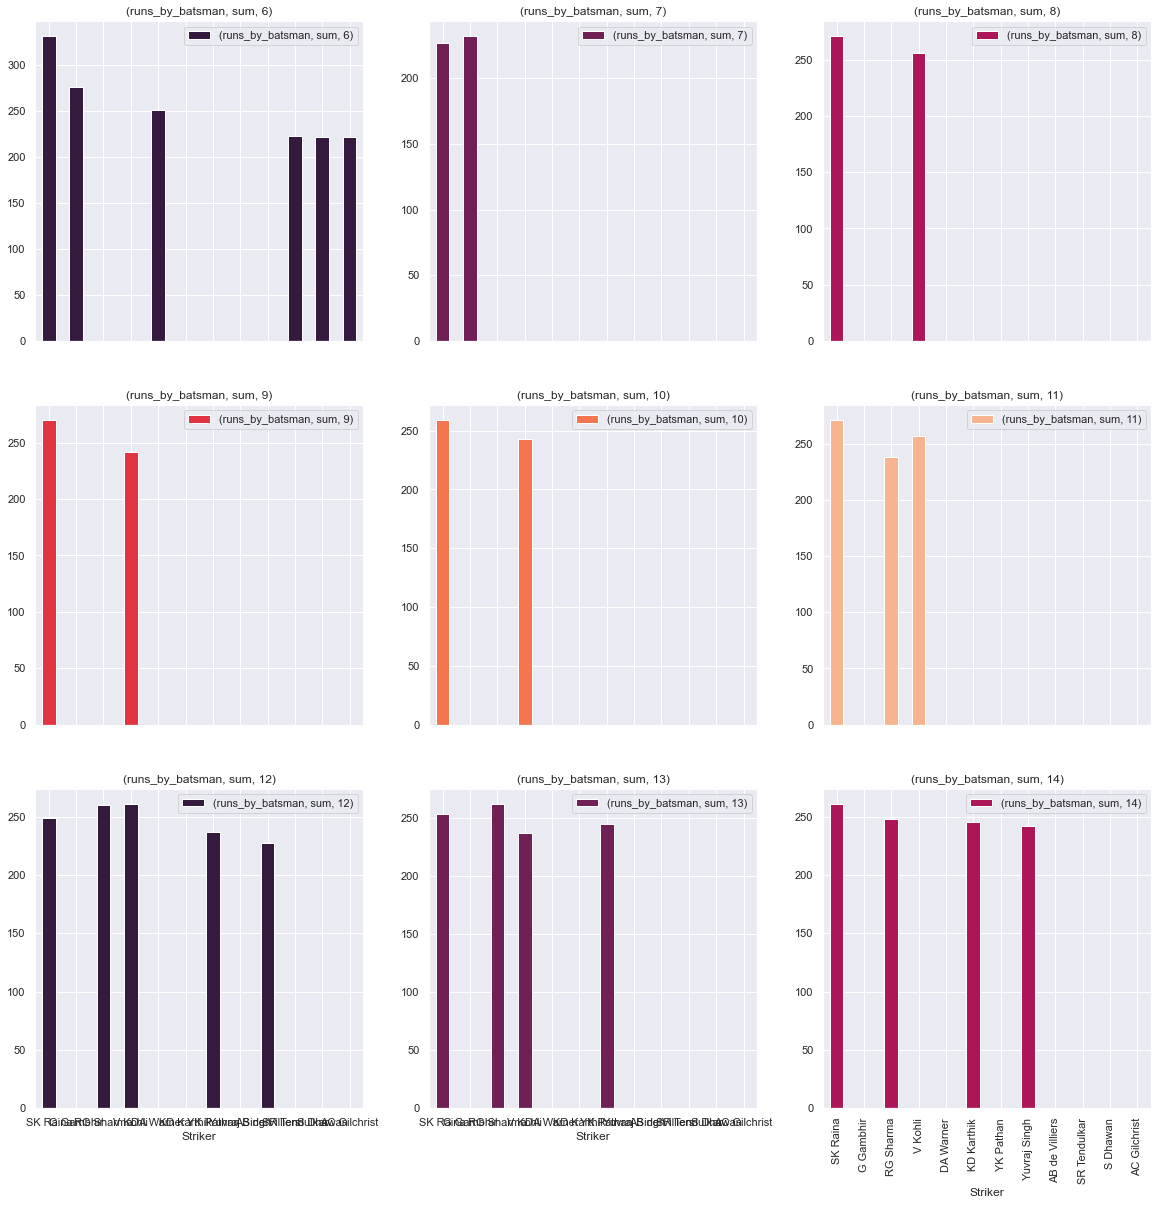

In [39]:
ax = middle_play_bat.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 20), layout=(3, 3))
plt.xticks(rotation=90)
plt.show()

In [40]:
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=16) & (match_stats_venue['Over_Id']<=20) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temp))
print(temp.shape)
temp.head()

<class 'pandas.core.frame.DataFrame'>
(1555, 1)


runs_by_batsman
                                   sum
Over_Id Striker                       
16      A Ashish Reddy            22.0
        A Chopra                   1.0
        A Flintoff                 3.0
        A Kumble                   5.0
        A Mishra                  15.0

In [41]:
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)
temp.head()

,,runs_by_batsman
,,sum
Over_Id,Striker,
17,MS Dhoni,412.0
20,MS Dhoni,405.0
18,MS Dhoni,392.0
19,MS Dhoni,366.0
16,MS Dhoni,333.0


In [42]:
mean_death = temp[('runs_by_batsman','sum')].mean()
print(mean_death)

28.998713826366558


In [43]:
temp = temp.loc[(temp[('runs_by_batsman','sum')]>mean_death)]

In [44]:
death_play_bat = temp.head(30)
death_play_bat

runs_by_batsman
                                   sum
Over_Id Striker                       
17      MS Dhoni                 412.0
20      MS Dhoni                 405.0
18      MS Dhoni                 392.0
19      MS Dhoni                 366.0
16      MS Dhoni                 333.0
17      RG Sharma                310.0
        KA Pollard               292.0
16      AB de Villiers           290.0
18      KA Pollard               269.0
16      Yuvraj Singh             263.0
        V Kohli                  261.0
18      AB de Villiers           253.0
19      AB de Villiers           250.0
16      RG Sharma                249.0
18      RG Sharma                247.0
        JP Duminy                243.0
17      AB de Villiers           242.0
        YK Pathan                234.0
16      YK Pathan                228.0
19      KA Pollard               226.0
20      RG Sharma                211.0
19      RG Sharma                210.0
18      V Kohli                  207.0
20      KA Pollard               206.0
17      V Kohli                  204.0
16      KA Pollard               201.0
        SK Raina                 197.0
19      DJ Bravo                 187.0
18      YK Pathan                187.0
17      SK Raina                 184.0

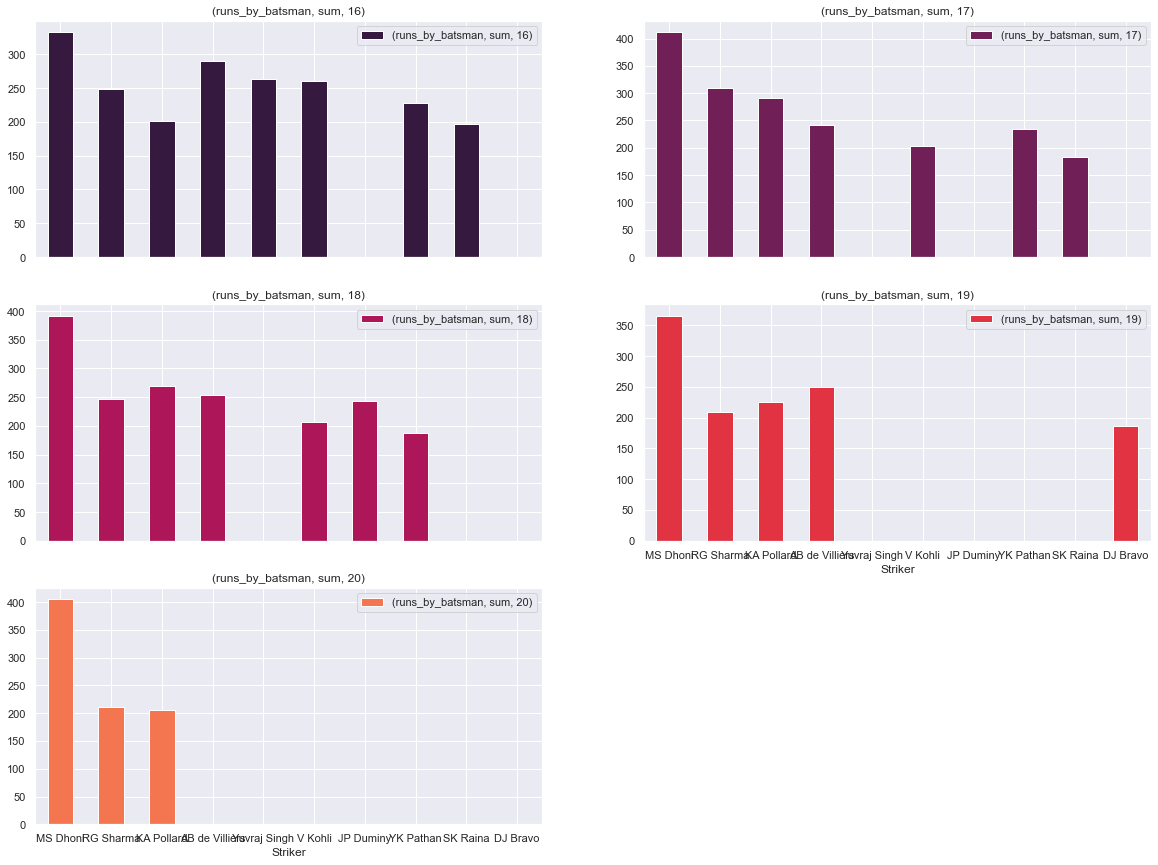

In [45]:
ax = death_play_bat.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 20), layout=(4, 2))
plt.xticks(rotation=90)
plt.show()

In [46]:
match_stats_venue.head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [47]:
match_stats_venue['Kind_Out'].unique()

array([nan, 'caught', 'bowled', 'lbw', 'run out', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [48]:
bowler_stats =match_stats_venue.groupby('bowler').agg({'Ball_Id':lambda x: x.count(),
                                           'Extra_Runs':lambda x: x.sum(),
                                           'runs_by_batsman':lambda x: x.sum(),
                                           'Kind_Out':lambda x: x.count()})

In [49]:
bowler_stats.head()

,Ball_Id,Extra_Runs,runs_by_batsman,Kind_Out
bowler,,,,
A Ashish Reddy,270,14.0,386.0,19
A Chandila,234,3.0,242.0,11
A Flintoff,66,1.0,105.0,2
A Kumble,983,62.0,1027.0,49
A Mishra,2466,108.0,2846.0,132


In [50]:
bowler_stats = bowler_stats.sort_values(['Kind_Out'],ascending=False)
bowler_stats.head()

,Ball_Id,Extra_Runs,runs_by_batsman,Kind_Out
bowler,,,,
SL Malinga,2407,234.0,2407.0,159
DJ Bravo,2110,157.0,2658.0,137
A Mishra,2466,108.0,2846.0,132
Harbhajan Singh,2742,154.0,3030.0,128
PP Chawla,2472,115.0,3021.0,127


In [51]:
over = bowler_stats['Ball_Id']/6
economay = bowler_stats['runs_by_batsman']/over
bowl_str_rt = bowler_stats['Ball_Id']/bowler_stats['Kind_Out']
bowling_avg = bowler_stats['runs_by_batsman']/bowler_stats['Kind_Out']

In [52]:
bowler_stats['overs_balled']=bowler_stats['Ball_Id']/6
bowler_stats['econamy'] = bowler_stats['runs_by_batsman']/over
bowler_stats['bowl_str_rt'] = bowler_stats['Ball_Id']/bowler_stats['Kind_Out']
bowler_stats['bowling_avg'] = bowler_stats['runs_by_batsman']/bowler_stats['Kind_Out']

In [53]:
bowler_stats.head()
# lower the bowling_avg good
bowler_stats = bowler_stats.to_csv(r'C:\E\IMARTICUS\SEM_2\DL_ML\bowl_stats.csv')
bowler_stats = pd.read_csv('bowl_stats.csv')

In [54]:
bowler_stats=bowler_stats.head(30)
bowler_stats.head()
bowler_stats.sort_values('Extra_Runs',ascending=False)

,bowler,Ball_Id,Extra_Runs,runs_by_batsman,Kind_Out,overs_balled,econamy,bowl_str_rt,bowling_avg
0,SL Malinga,2407,234.0,2407.0,159,401.166667,6.000000,15.138365,15.138365
15,P Kumar,2529,222.0,2966.0,96,421.500000,7.036773,26.343750,30.895833
10,RP Singh,1874,181.0,2230.0,100,312.333333,7.139808,18.740000,22.300000
9,DW Steyn,2159,166.0,2209.0,100,359.833333,6.138953,21.590000,22.090000
16,SR Watson,1795,157.0,2087.0,95,299.166667,6.976045,18.894737,21.968421
1,DJ Bravo,2110,157.0,2658.0,137,351.666667,7.558294,15.401460,19.401460
8,Z Khan,2030,154.0,2383.0,107,338.333333,7.043350,18.971963,22.271028
3,Harbhajan Singh,2742,154.0,3030.0,128,457.000000,6.630197,21.421875,23.671875
14,JA Morkel,1806,153.0,2256.0,96,301.000000,7.495017,18.812500,23.500000
18,UT Yadav,1729,148.0,2222.0,89,288.166667,7.710816,19.426966,24.966292


In [55]:
col = [bowler_stats['Ball_Id'],
      bowler_stats['Extra_Runs'],
      bowler_stats['runs_by_batsman'],
      bowler_stats['Kind_Out'],
      bowler_stats['overs_balled'],
      bowler_stats['econamy'],
      bowler_stats['bowl_str_rt'],
      bowler_stats['bowling_avg']]

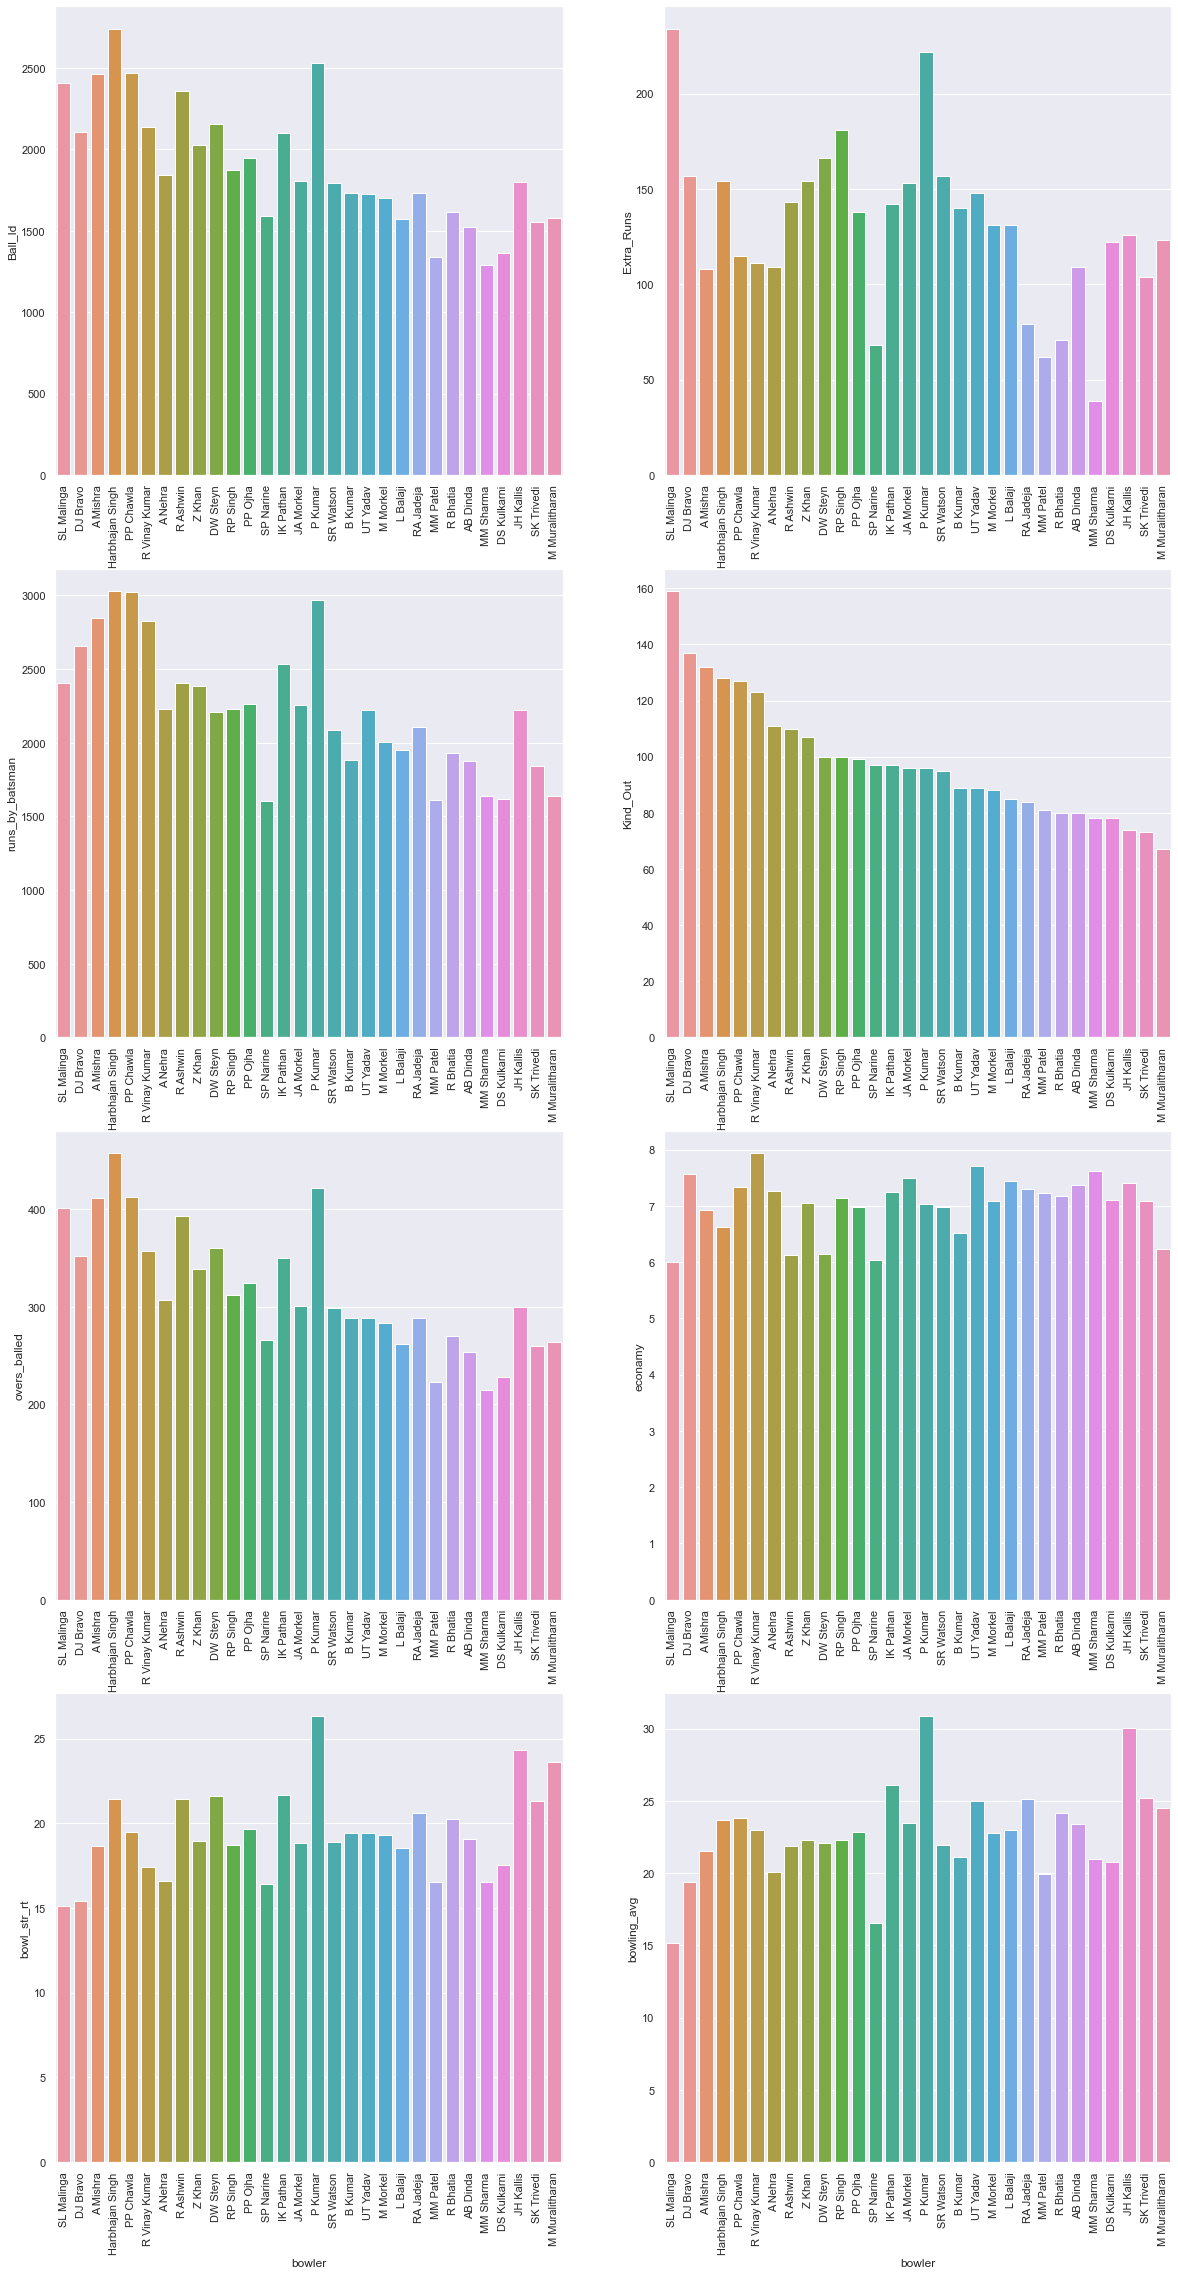

In [56]:
plt.figure(figsize=(20,50))
c=1
for i in col:    
    plt.subplot(5,2,c)
    sns.barplot(x=bowler_stats['bowler'],y=i)
    plt.xticks(rotation=90)
    c+=1
plt.show()

In [57]:
six = six_four.loc[six_four['runs_by_batsman']==6]
six = six.groupby(['bowler']).agg({'runs_by_batsman': lambda x:x.count()})
six = six.sort_values("runs_by_batsman",axis=0,ascending=False)

In [58]:
six_bowling = six.head(20)
sixes_bowling = six_bowling.to_csv(r'C:\E\IMARTICUS\SEM_2\DL_ML\bowling_six.csv')
sixes_bowling = pd.read_csv('bowling_six.csv')

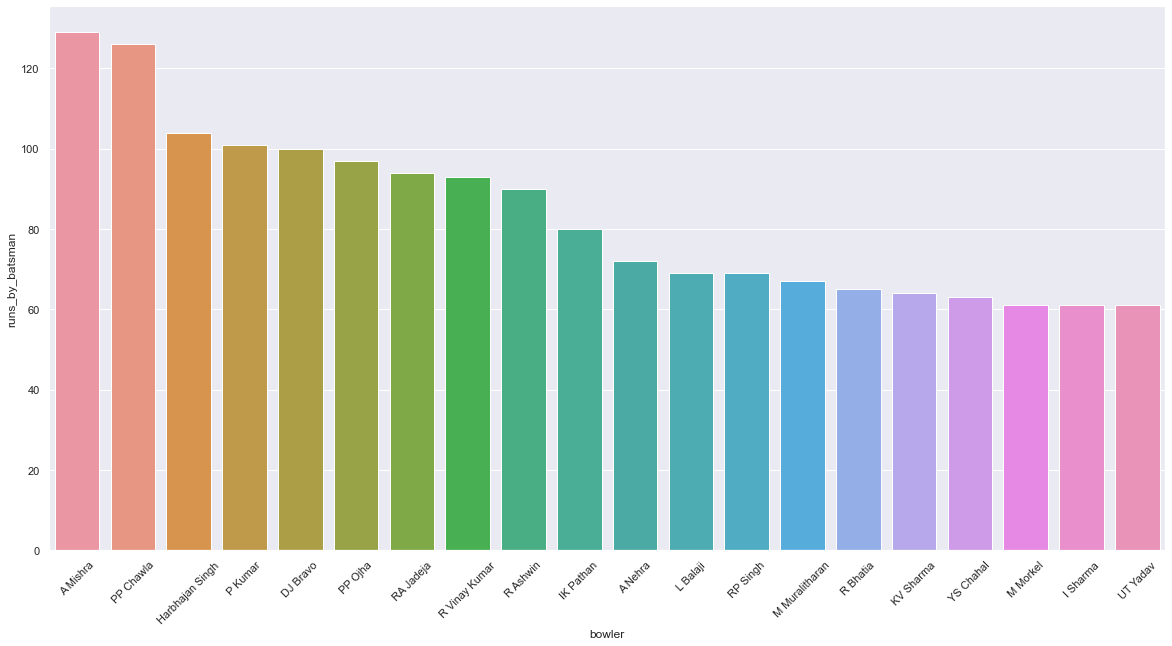

In [59]:
six=six.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=sixes_bowling['bowler'],y=sixes_bowling['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [60]:
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=1) & (match_stats_venue['Over_Id']<6) ]
temp = temp.groupby(['Over_Id','bowler']).agg({'runs_by_batsman':['sum'],
                                              'Kind_Out':['count']})

In [61]:
temp = temp.sort_values(by=[('Kind_Out', 'count')],ascending=False)
print(temp.shape)
temp=temp.head(20)

(868, 2)


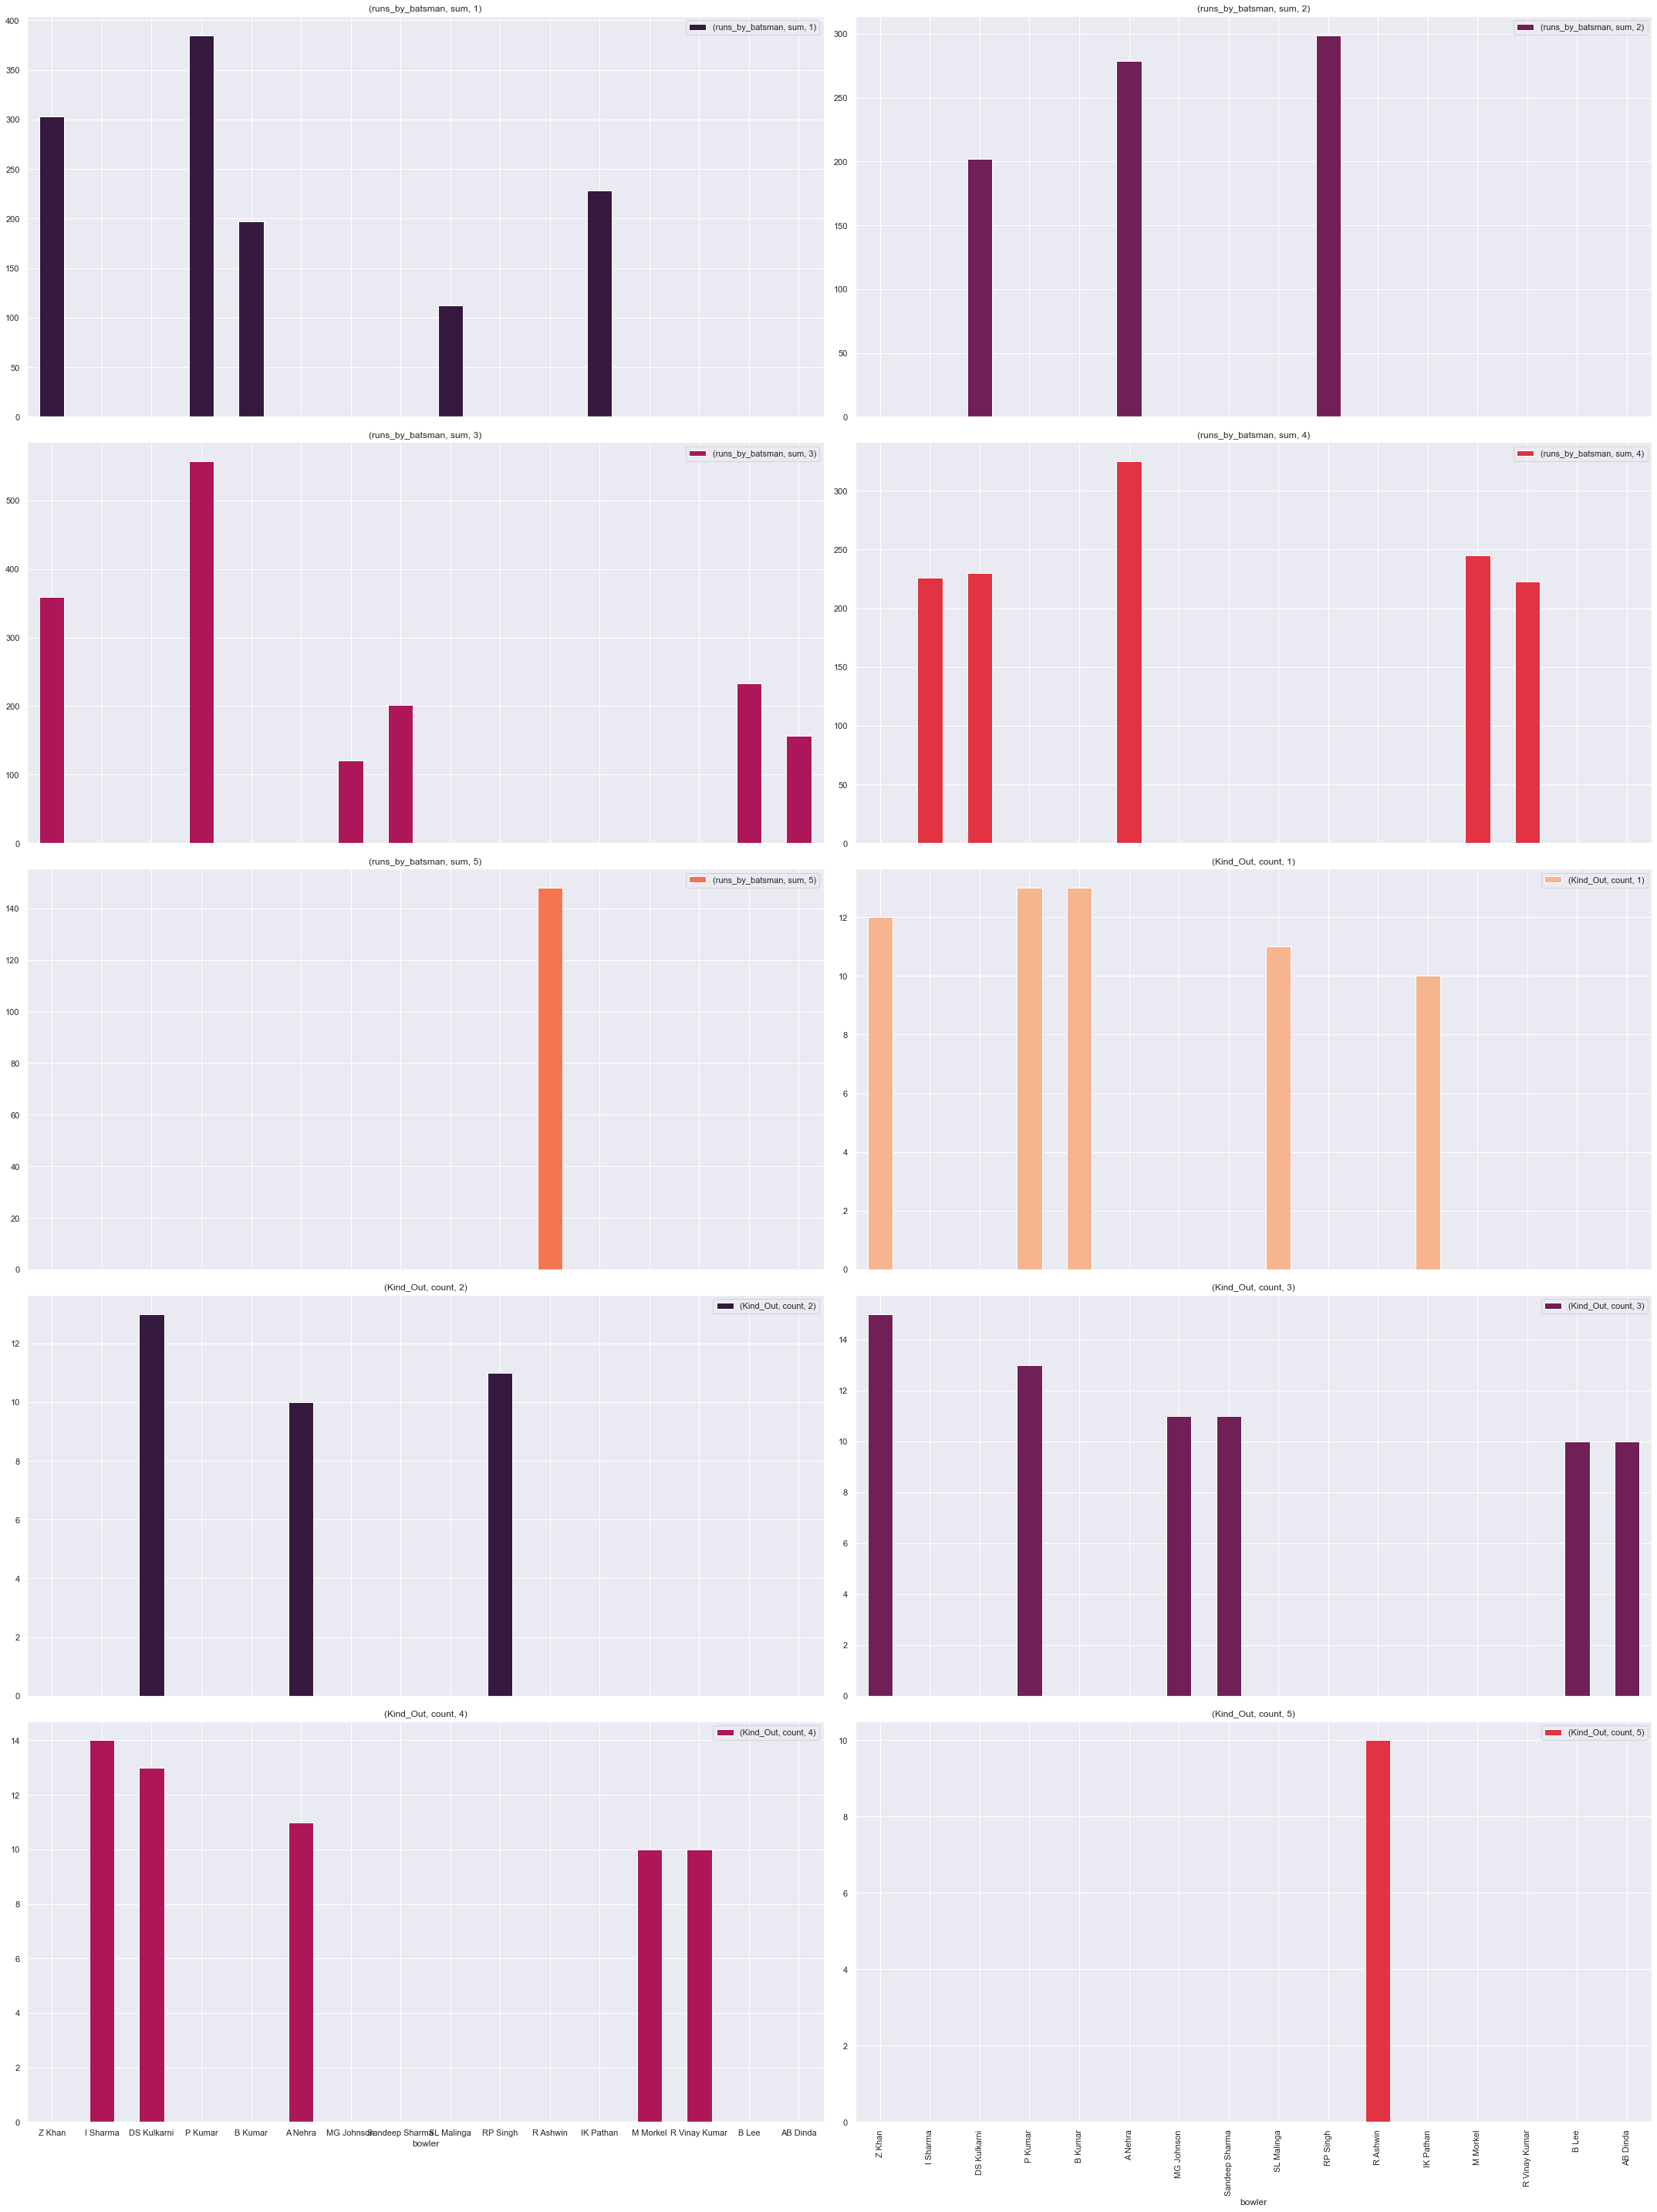

In [62]:
ax = temp.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(30, 40), layout=(5, 2))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(1949, 2)


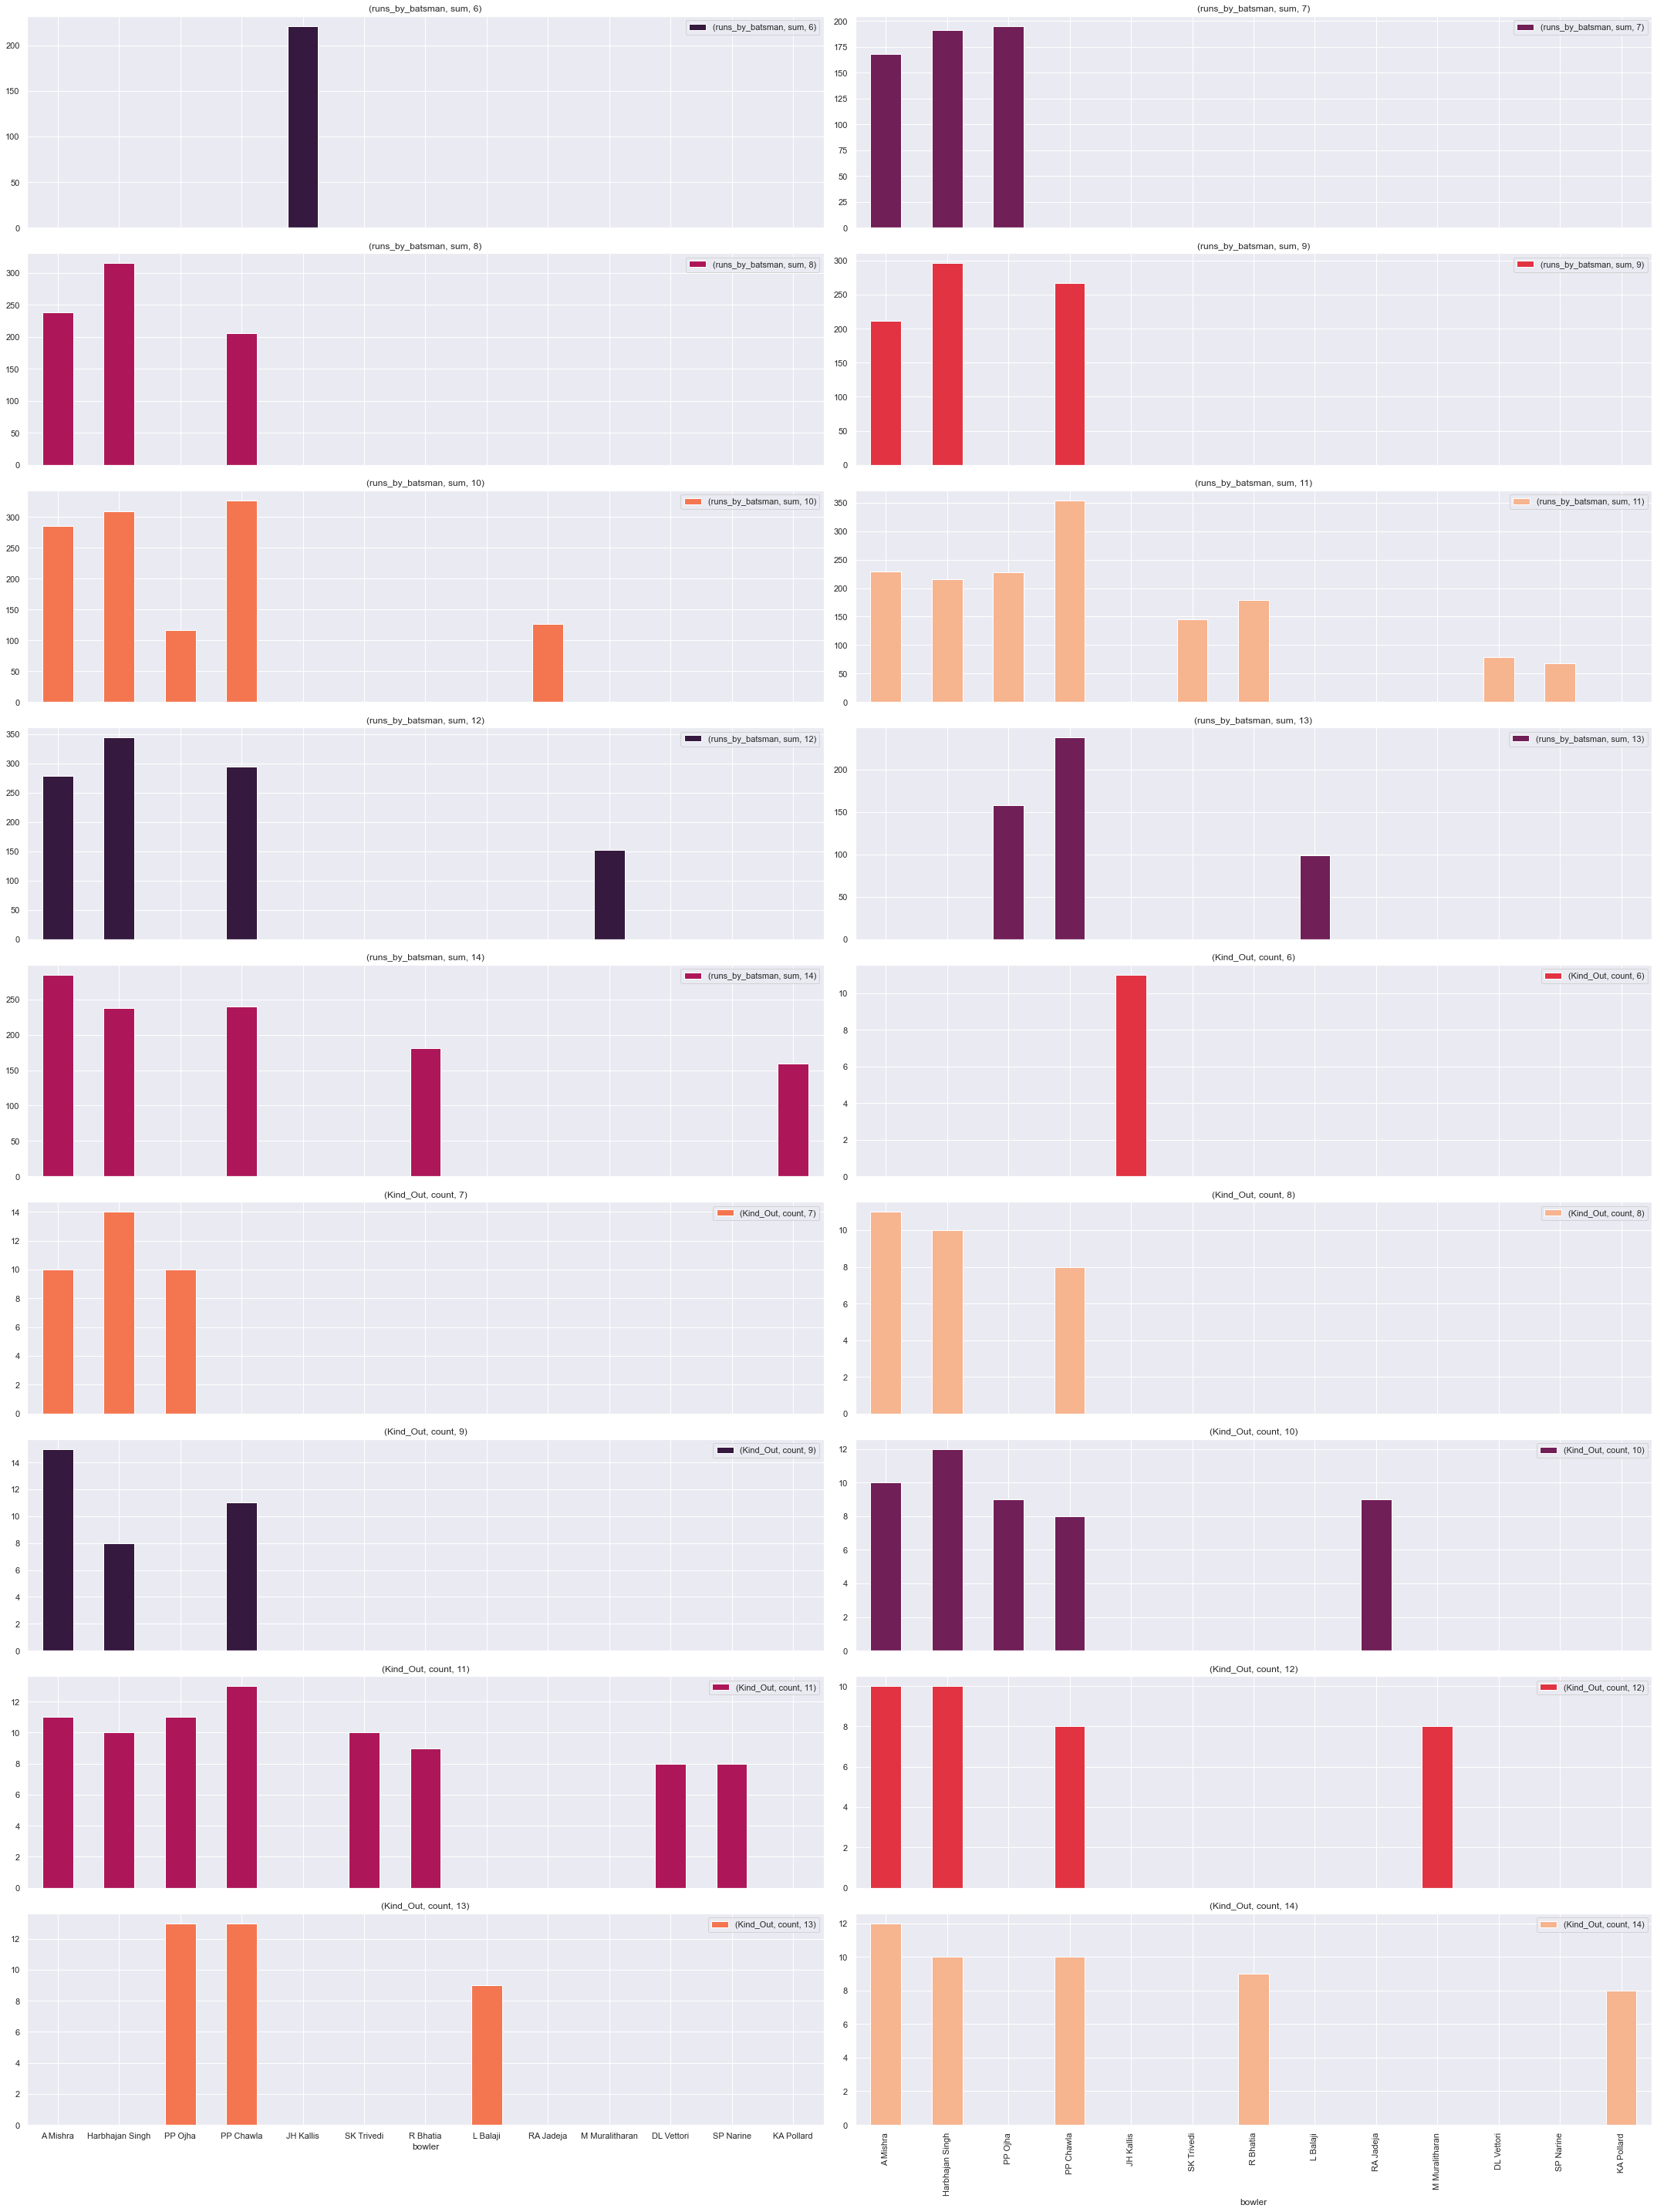

In [63]:
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=6) & (match_stats_venue['Over_Id']<15) ]
temp = temp.groupby(['Over_Id','bowler']).agg({'runs_by_batsman':['sum'],
                                              'Kind_Out':['count']})
temp = temp.sort_values(by=[('Kind_Out', 'count')],ascending=False)
print(temp.shape)
temp=temp.head(35)
ax = temp.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(30, 40), layout=(9, 2))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(1199, 2)


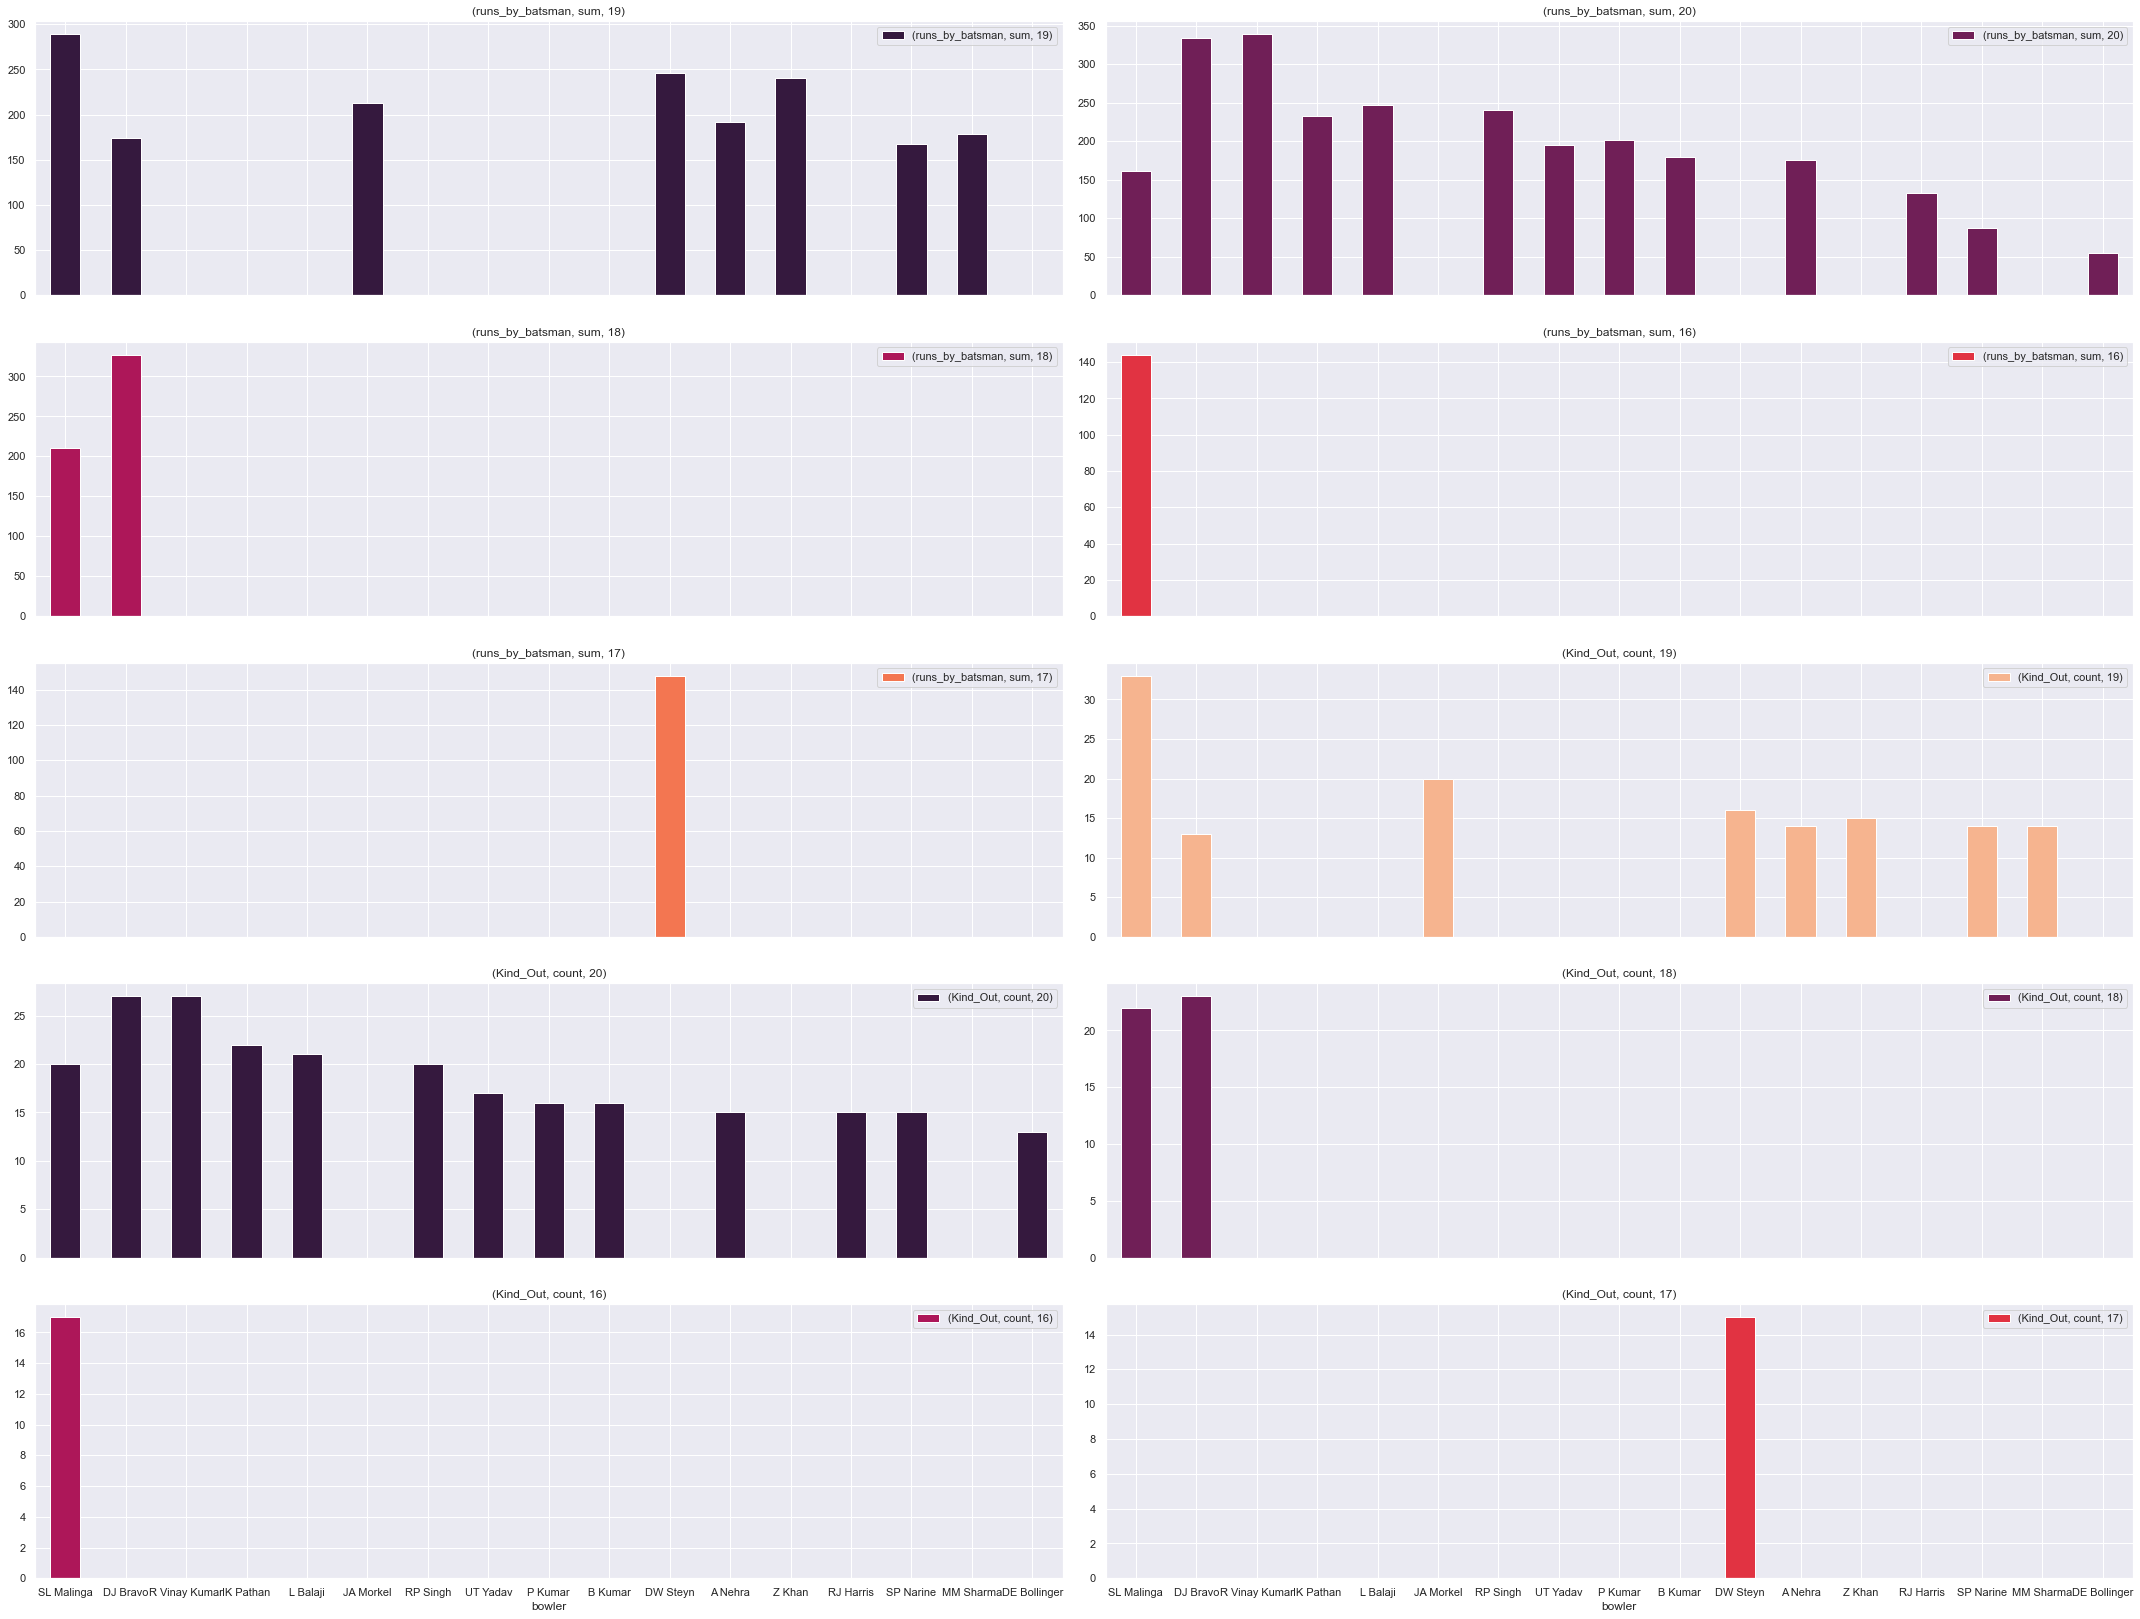

In [64]:
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=15) & (match_stats_venue['Over_Id']<=20) ]
temp = temp.groupby(['Over_Id','bowler']).agg({'runs_by_batsman':['sum'],
                                              'Kind_Out':['count']})
temp = temp.sort_values(by=[('Kind_Out', 'count')],ascending=False)
print(temp.shape)
temp=temp.head(25)
ax = temp.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(30, 40), layout=(9, 2))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(1837, 2)


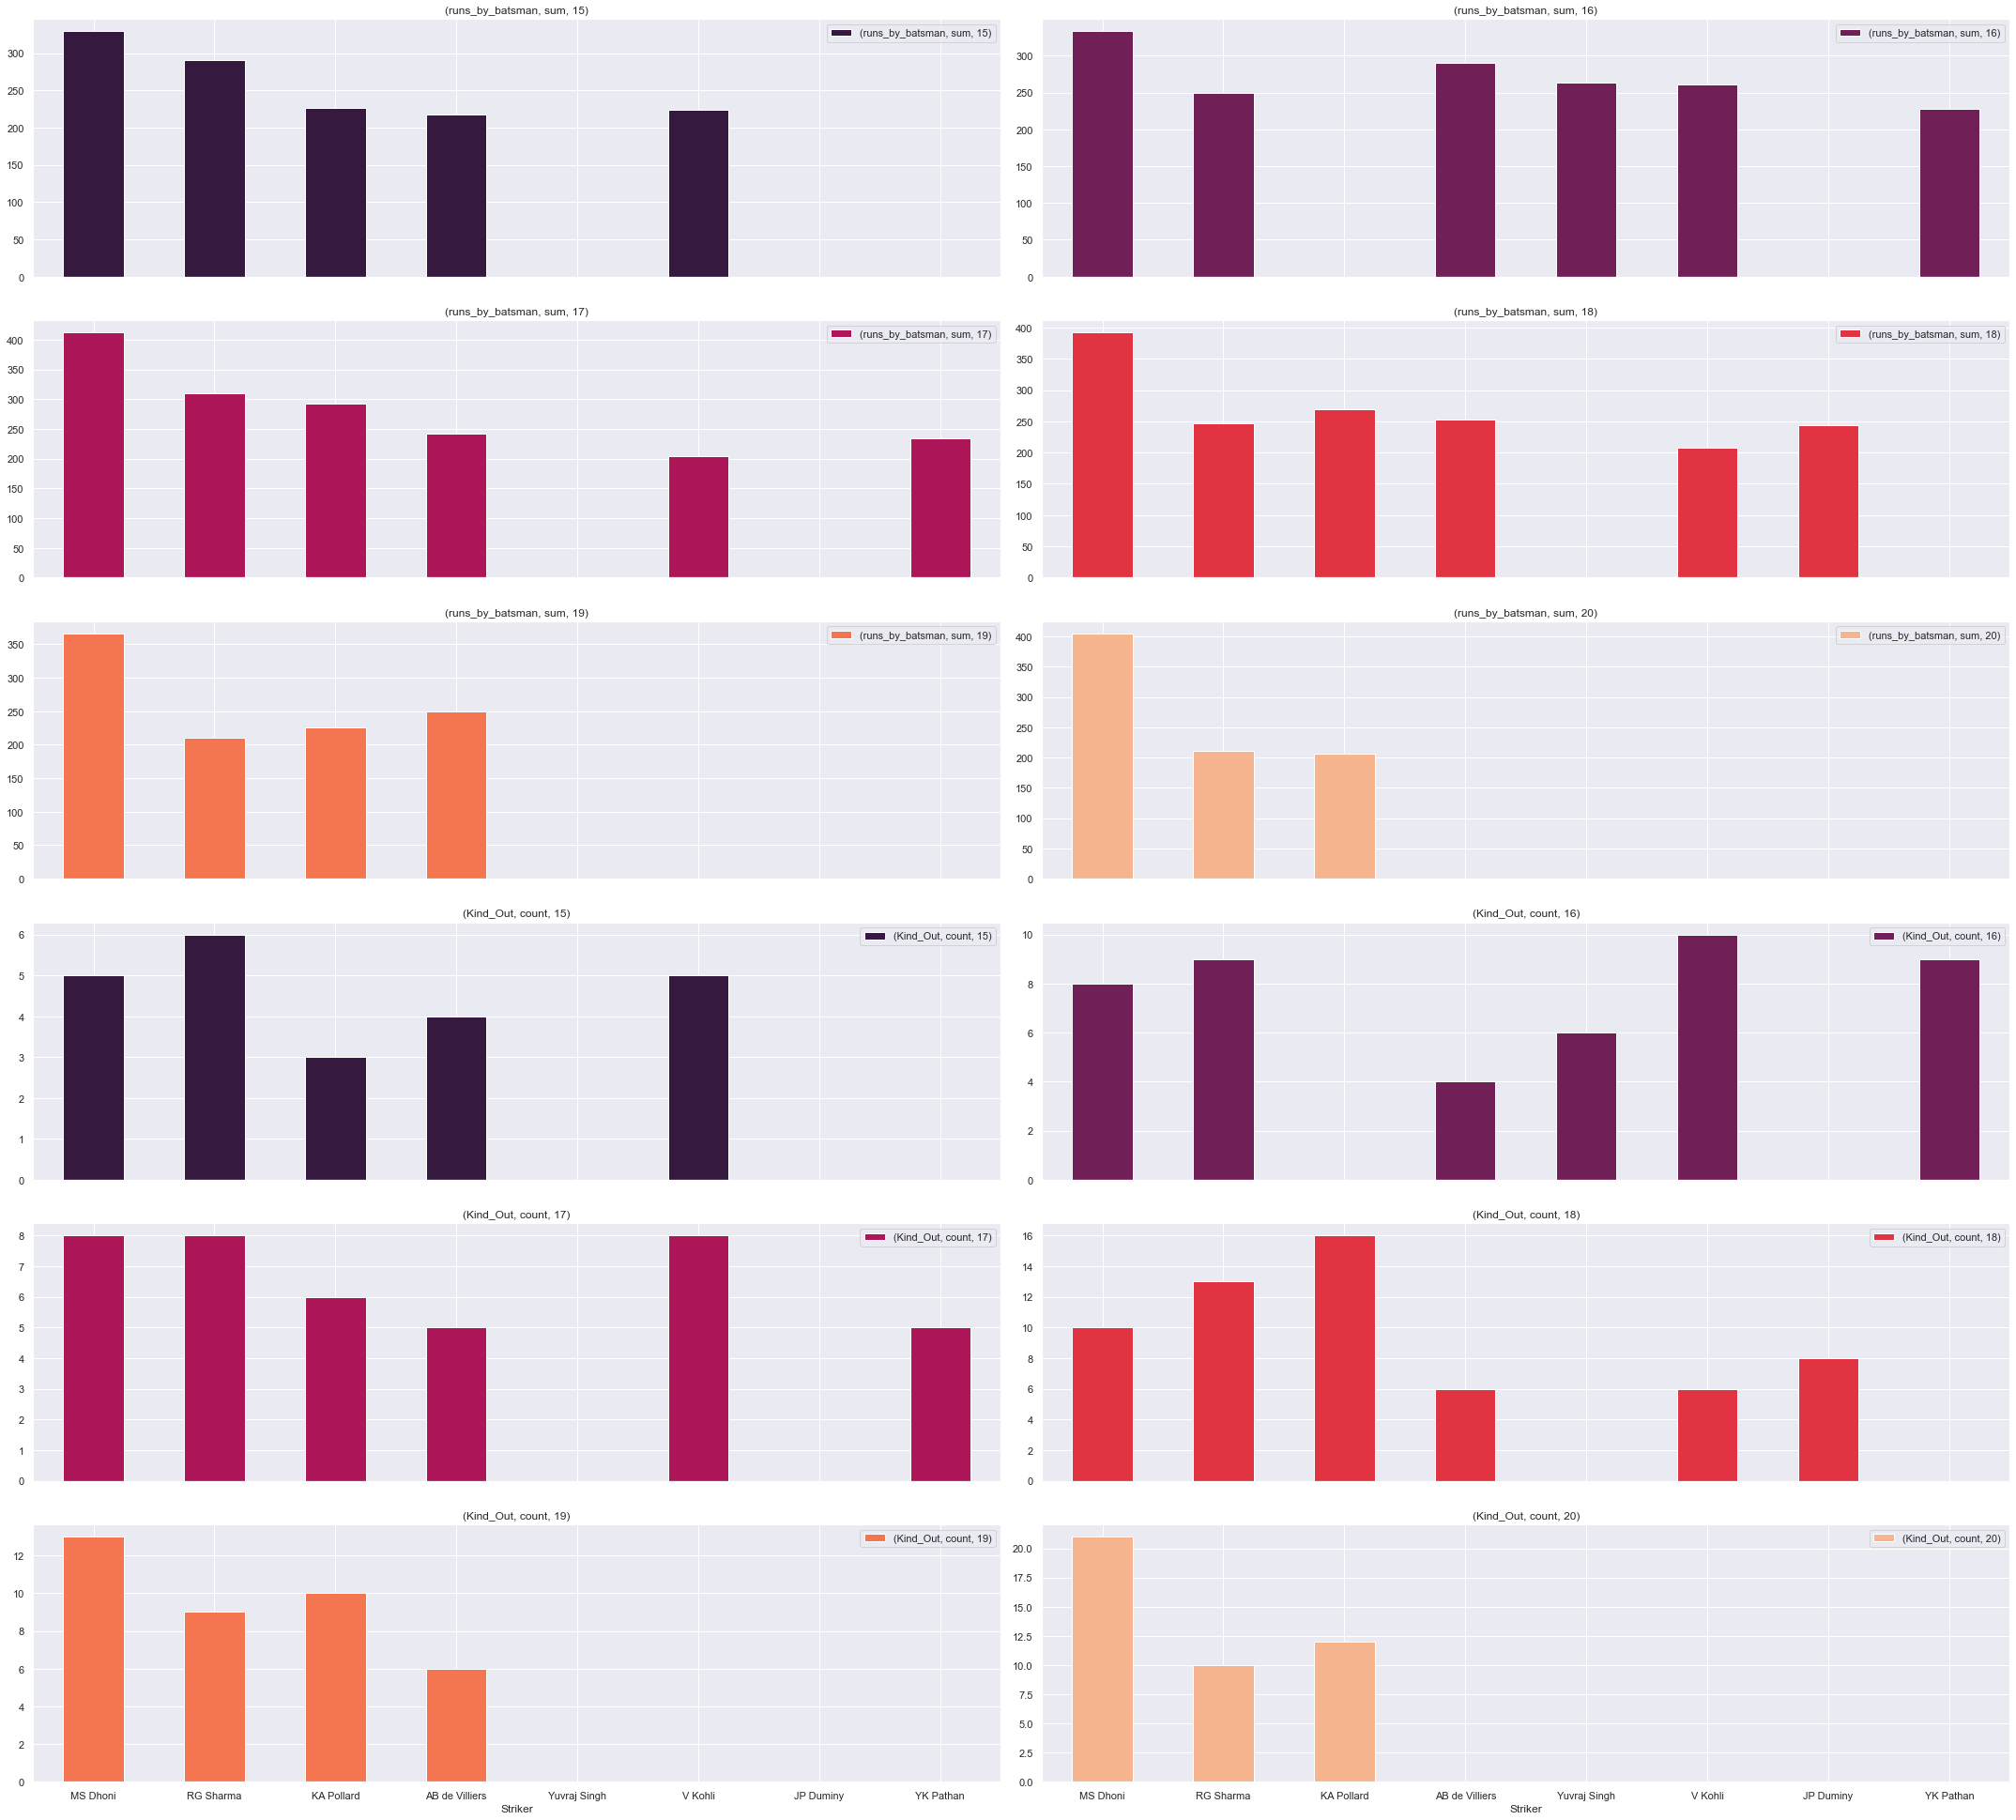

In [65]:
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=15) & (match_stats_venue['Over_Id']<=20) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum'],
                                              'Kind_Out':['count']})
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)
print(temp.shape)
temp=temp.head(30)
ax = temp.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(30, 40), layout=(9, 2))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(2104, 2)


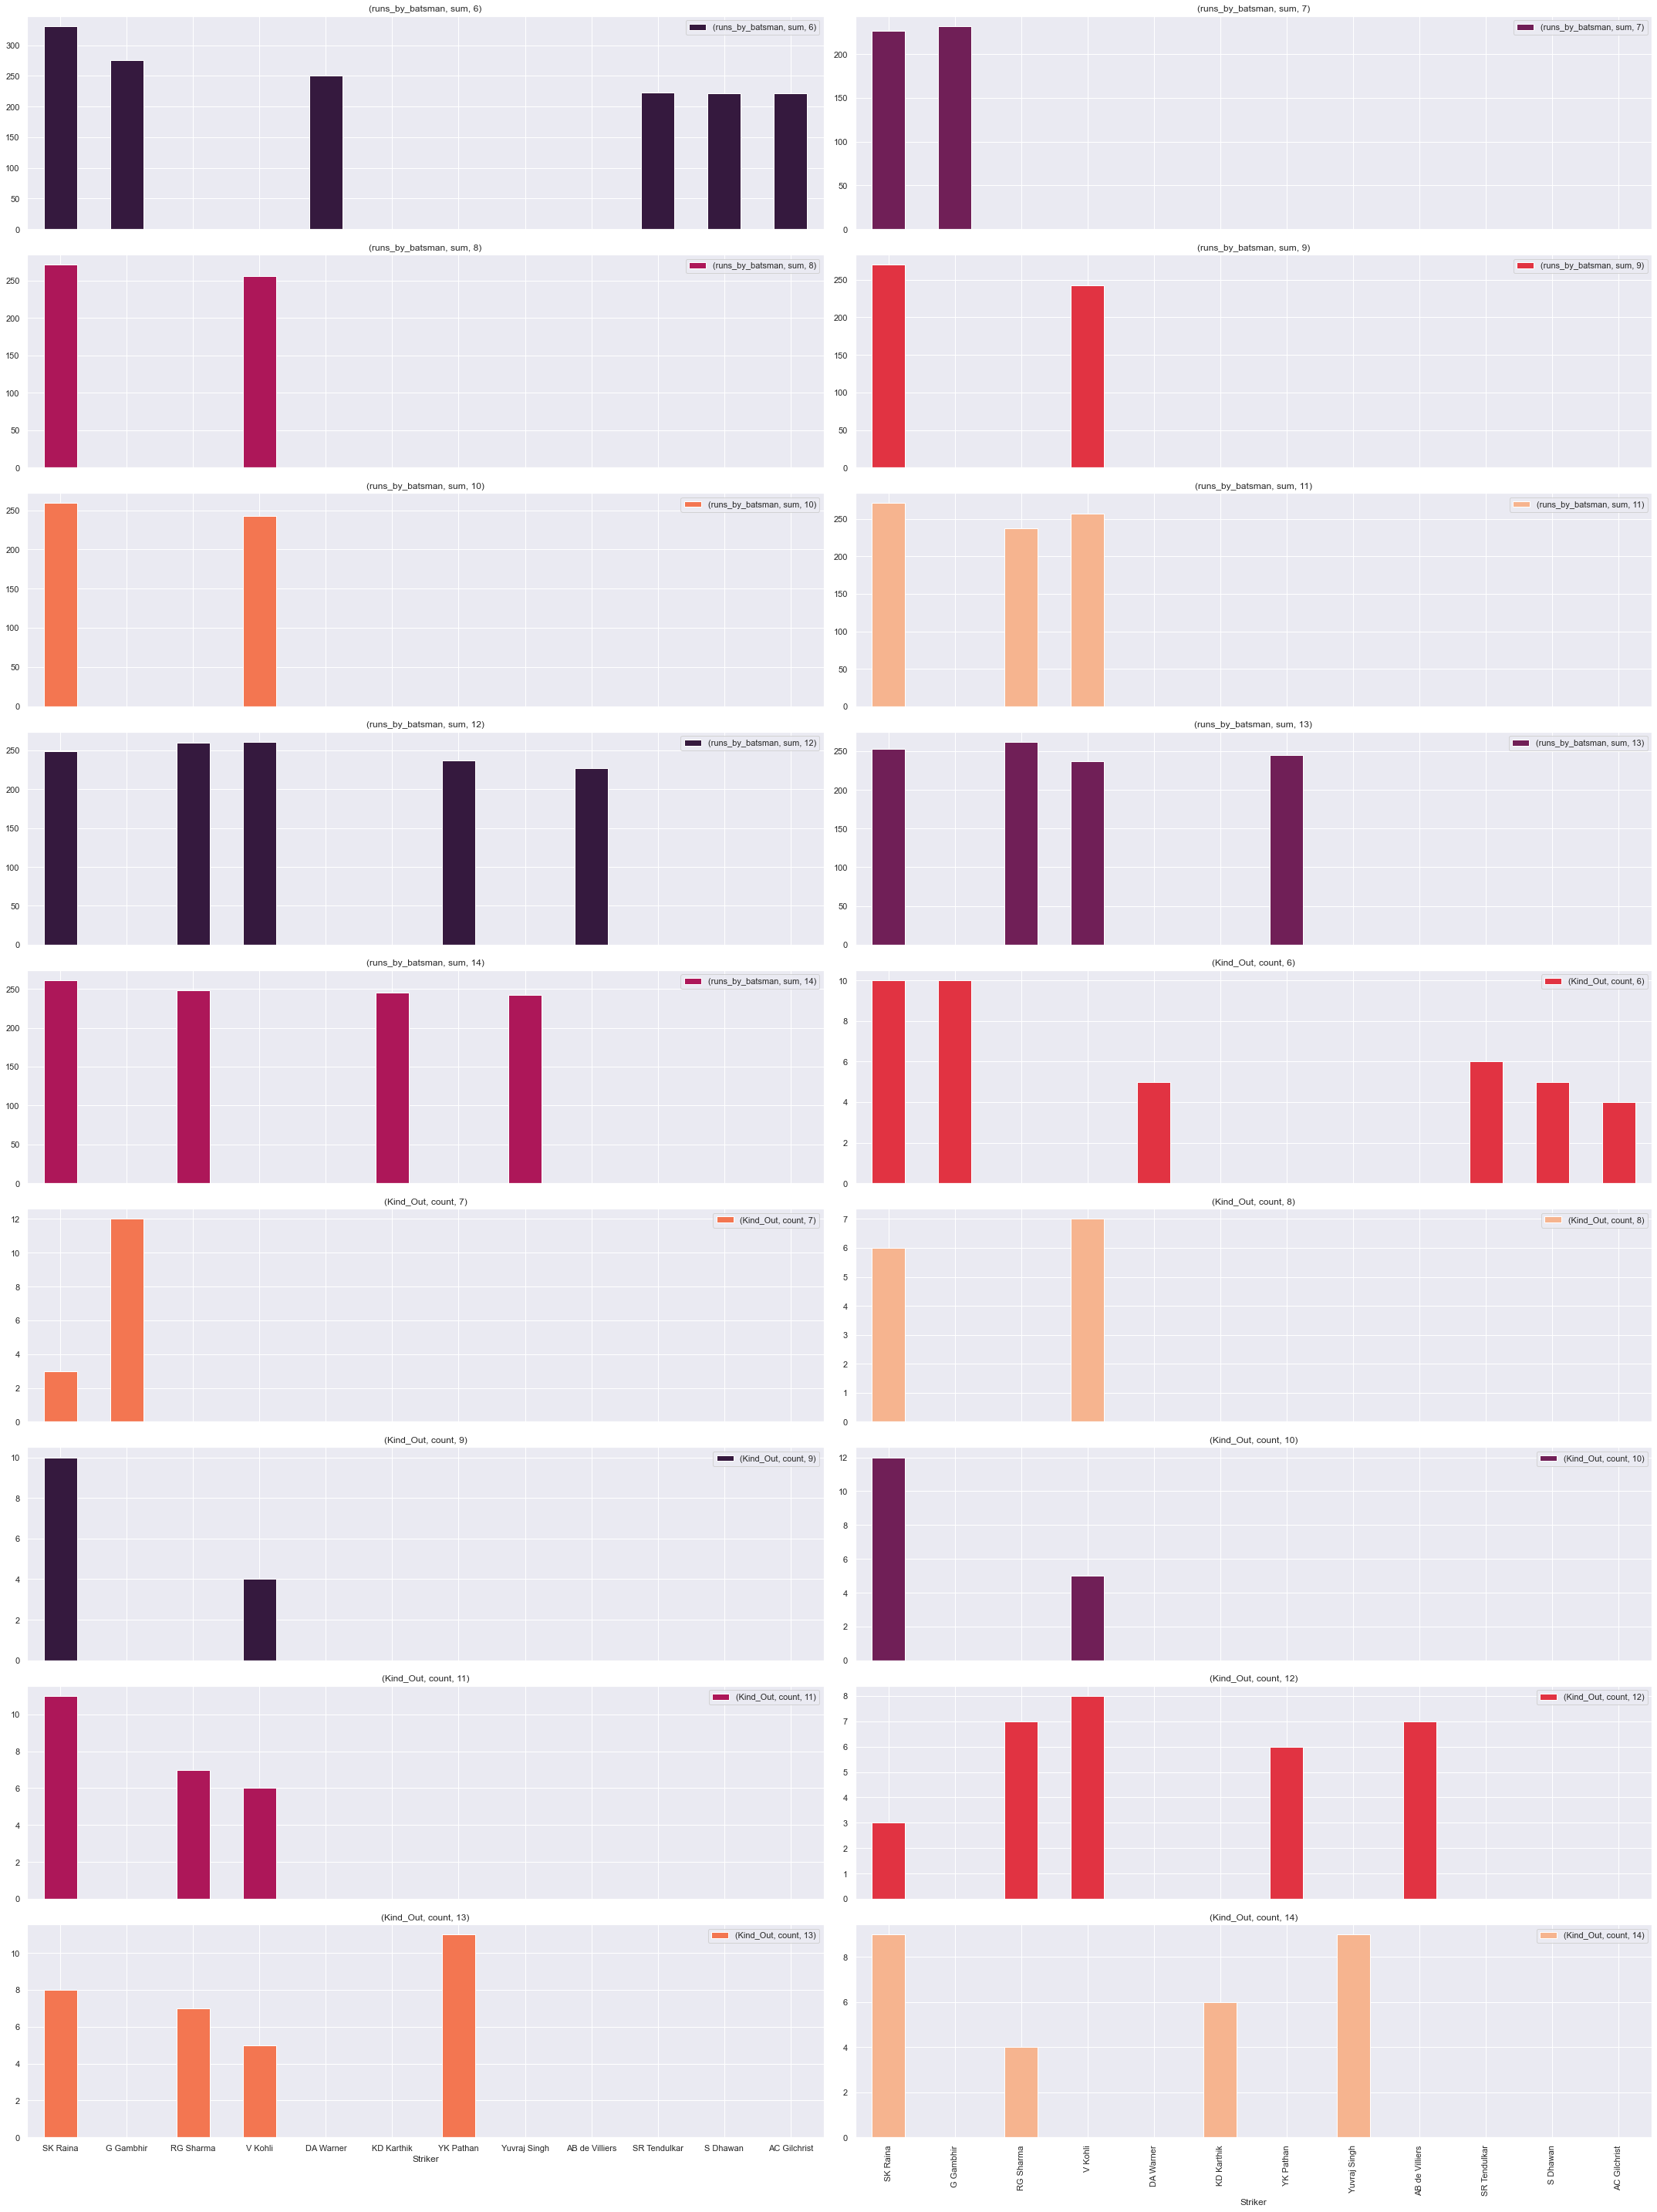

In [66]:
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=6) & (match_stats_venue['Over_Id']<15) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum'],
                                              'Kind_Out':['count']})
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)
print(temp.shape)
temp=temp.head(30)
ax = temp.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(30, 40), layout=(9, 2))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(923, 2)


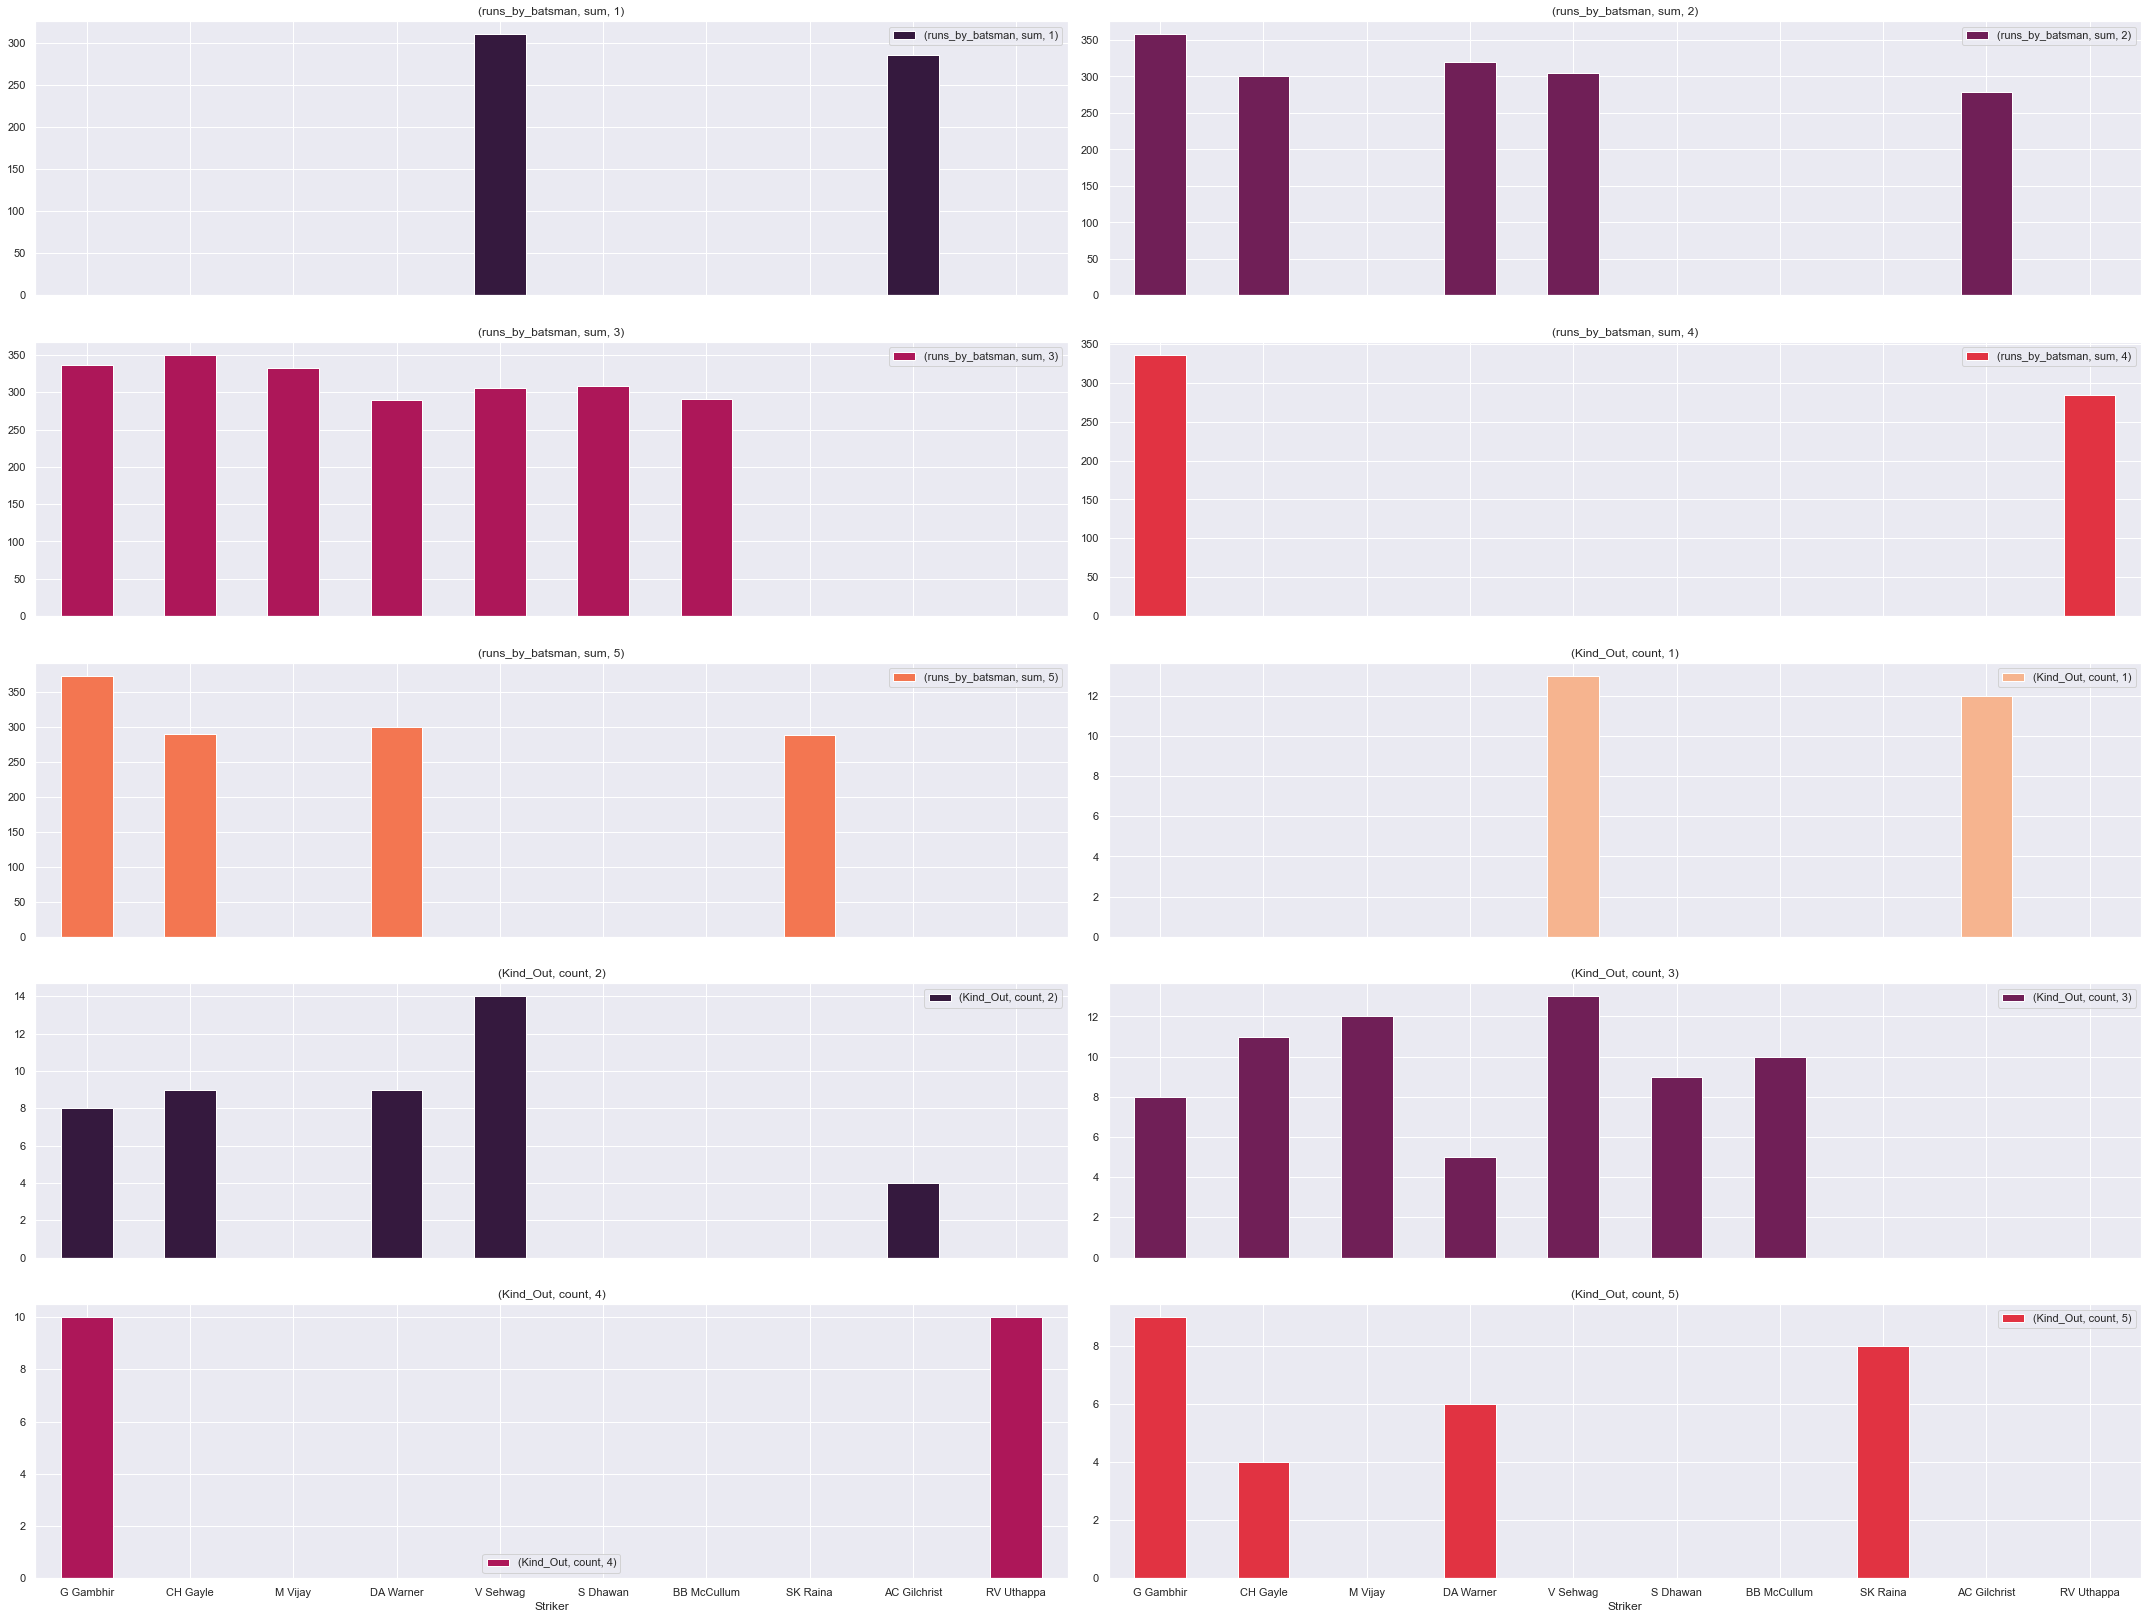

In [67]:
temp=match_stats_venue.loc[(match_stats_venue['Over_Id']>=1) & (match_stats_venue['Over_Id']<6) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum'],
                                              'Kind_Out':['count']})
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)
print(temp.shape)
temp=temp.head(20)
ax = temp.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(30, 40), layout=(9, 2))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [68]:
match=match_stats_venue
match.head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [69]:
ms_dhoni_wicket=match.loc[match['Fielders']=='MS Dhoni']

In [70]:
ms_dhoni_wicket['Fielders'].count()

111